In [3]:
import matplotlib.pyplot as plt
import numpy as np
# Make notebook fill the whole screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [6]:
def rotated(angle, center, p):
    pprime = np.array(p) - np.array(center)
    coordX = np.cos(angle)*pprime[0]-np.sin(angle)*pprime[1]
    coordY = np.sin(angle)*pprime[0]+np.cos(angle)*pprime[1]
    return np.array([coordX+center[0],coordY+center[1]])
#note: this function assumes p2 is between p1 and p3, i.e. p2 is neither the end nor the beginning of the arc
def genArcPoints(p1, p2, p3, numpoints=10, verbose=False):
    #find center, stolen from
    #https://stackoverflow.com/questions/4103405/what-is-the-algorithm-for-finding-the-center-of-a-circle-from-three-points
    ax = (p1[0] + p2[0]) / 2.
    ay = (p1[1] + p2[1]) / 2.
    ux = (p1[1] - p2[1])
    uy = (p2[0] - p1[0])
    bx = (p2[0] + p3[0]) / 2.
    by = (p2[1] + p3[1]) / 2.
    vx = (p2[1] - p3[1])
    vy = (p3[0] - p2[0])
    dx = ax - bx
    dy = ay - by
    vu = vx * uy - vy * ux
    g = (dx * uy - dy * ux) / vu
    center = np.array([-1.,-1.])
    center[0] = bx + g * vx
    center[1] = by + g * vy
    #find radius
    radius = np.sqrt((center[0]-p1[0])**2 + (center[1]-p1[1])**2)
    #print(f"radius: {radius}")
    #find angles of p1 and p3
    p1p3 = np.linalg.norm(np.array(p1)-np.array(p3))
    #print(f"Error in arccos: radius {radius:.4}, p1p3 {p1p3:.4}, arccos({(2*radius**2 - p1p3**2)/(2*radius**2)})")
    alpha = np.arccos((2*radius**2 - p1p3**2)/(2*radius**2))
    error_normal = np.linalg.norm(rotated(alpha,center,p1)-np.array(p3))
    error_plus = np.linalg.norm(rotated(alpha+np.pi/2.,center,p1)-np.array(p3))
    error_mnormal = np.linalg.norm(rotated(-alpha,center,p1)-np.array(p3))
    error_mplus = np.linalg.norm(rotated(-alpha-np.pi/2.,center,p1)-np.array(p3))
    errors = [error_normal, error_plus, error_mnormal, error_mplus]
    if(error_plus == np.min(errors)):
        print("Error plus")
        alpha += np.pi*0.5
    elif(error_mnormal == np.min(errors)):
        alpha *= -1
    elif(error_mplus == np.min(errors)):
        print("Error mplus")
        alpha *= -1
        alpha -= np.pi/2.
    if verbose:
        print(f"alpha: {alpha}")
    fixed = 0
    if(abs(alpha - 2.42389560) < 1e-5): #correct alpha in case of redundant bondpads, need obtuse angle
        if verbose:
            print("Corrected alpha (case 1)")
        alpha -= 2*np.pi
        fixed = 1
    elif(abs(alpha + 2.42389560) < 1e-5): #correct alpha in case of redundant bondpads, need obtuse angle
        if verbose:
            print("Corrected alpha (case 2)")
        alpha += 2*np.pi
        fixed = 1
    elif(abs(alpha + 2.422896175) < 1e-5): #correct alpha in case of redundant bondpads, need obtuse angle
        if verbose:
            print("Corrected alpha (case 3)")
        alpha += 2*np.pi
        fixed = 1
    elif(abs(alpha - 2.422896175) < 1e-5): #correct alpha in case of redundant bondpads, need obtuse angle
        if verbose:    
            print("Corrected alpha (case 4)")
        alpha -= 2*np.pi
        fixed = 1
    elif(abs(alpha + 2.423062692458788) < 1e-5): #correct alpha in case of redundant bondpads, need obtuse angle
        if verbose:    
            print("Corrected alpha (case 5)")
        alpha += 2*np.pi
        fixed = 1
    elif(abs(alpha - 2.423062692458788) < 1e-5): #correct alpha in case of redundant bondpads, need obtuse angle
        if verbose:    
            print("Corrected alpha (case 6)")
        alpha -= 2*np.pi
        fixed = 1
    elif(abs(alpha + 2.42279618106908) < 1e-5): #correct alpha in case of redundant bondpads, need obtuse angle
        if verbose:    
            print("Corrected alpha (case 7)")
        alpha += 2*np.pi
        fixed = 1
    elif(abs(alpha - 2.42279618106908) < 1e-5): #correct alpha in case of redundant bondpads, need obtuse angle
        if verbose:    
            print("Corrected alpha (case 8)")
        alpha -= 2*np.pi
        fixed = 1
    elif(abs(alpha + 0.16629124932821351) < 1e-5): #correct alpha in case of drive pads, need obtuse angle
        if verbose:    
            print("Corrected alpha (case 9)")
        alpha += 2*np.pi
        fixed = 1
    elif(abs(alpha - 0.16629124932821351) < 1e-5): #correct alpha in case of drive pads, need obtuse angle
        if verbose:    
            print("Corrected alpha (case 10)")
        alpha -= 2*np.pi
        fixed = 1
    
    if verbose:
        print(f"corrected alpha: {alpha}")
    #print(f"alpha: {alpha} (error: {np.linalg.norm(rotated(alpha,center,p1)-np.array(p3)):.4})")
    angles = np.linspace(0,alpha,numpoints,endpoint=False)
    points = []
    for gamma in angles[1:]:
        points.append(rotated(gamma, center, p1))
    return points, center, fixed 

In [36]:
def genArcPointsGeneral(p1, p2, p3, numpoints=10, verbose=False):
    #find center, stolen from
    #https://stackoverflow.com/questions/4103405/what-is-the-algorithm-for-finding-the-center-of-a-circle-from-three-points
    ax = (p1[0] + p2[0]) / 2.
    ay = (p1[1] + p2[1]) / 2.
    ux = (p1[1] - p2[1])
    uy = (p2[0] - p1[0])
    bx = (p2[0] + p3[0]) / 2.
    by = (p2[1] + p3[1]) / 2.
    vx = (p2[1] - p3[1])
    vy = (p3[0] - p2[0])
    dx = ax - bx
    dy = ay - by
    vu = vx * uy - vy * ux
    g = (dx * uy - dy * ux) / vu
    center = np.array([-1.,-1.])
    center[0] = bx + g * vx
    center[1] = by + g * vy
    #find radius
    radius = np.sqrt((center[0]-p1[0])**2 + (center[1]-p1[1])**2)
    #print(f"radius: {radius}")
    #find angles of p1 and p3
    p1p3 = np.linalg.norm(np.array(p1)-np.array(p3))
    #print(f"Error in arccos: radius {radius:.4}, p1p3 {p1p3:.4}, arccos({(2*radius**2 - p1p3**2)/(2*radius**2)})")
    alpha = np.arccos((2*radius**2 - p1p3**2)/(2*radius**2))
    error_normal = np.linalg.norm(rotated(alpha,center,p1)-np.array(p3))
    error_mnormal = np.linalg.norm(rotated(-alpha,center,p1)-np.array(p3))
    errors = [error_normal, error_mnormal]
    if(error_mnormal == np.min(errors)):
        alpha *= -1
    if verbose:
        print(f"alpha: {alpha}")
    fixed = 0
    """
    if(abs(alpha - 2.42389560) < 1e-5): #correct alpha in case of redundant bondpads, need obtuse angle
        if verbose:
            print("Corrected alpha (case 1)")
        alpha -= 2*np.pi
        fixed = 1
    elif(abs(alpha + 2.42389560) < 1e-5): #correct alpha in case of redundant bondpads, need obtuse angle
        if verbose:
            print("Corrected alpha (case 2)")
        alpha += 2*np.pi
        fixed = 1
    elif(abs(alpha + 2.422896175) < 1e-5): #correct alpha in case of redundant bondpads, need obtuse angle
        if verbose:
            print("Corrected alpha (case 3)")
        alpha += 2*np.pi
        fixed = 1
    elif(abs(alpha - 2.422896175) < 1e-5): #correct alpha in case of redundant bondpads, need obtuse angle
        if verbose:    
            print("Corrected alpha (case 4)")
        alpha -= 2*np.pi
        fixed = 1
    elif(abs(alpha + 2.423062692458788) < 1e-5): #correct alpha in case of redundant bondpads, need obtuse angle
        if verbose:    
            print("Corrected alpha (case 5)")
        alpha += 2*np.pi
        fixed = 1
    elif(abs(alpha - 2.423062692458788) < 1e-5): #correct alpha in case of redundant bondpads, need obtuse angle
        if verbose:    
            print("Corrected alpha (case 6)")
        alpha -= 2*np.pi
        fixed = 1
    elif(abs(alpha + 2.42279618106908) < 1e-5): #correct alpha in case of redundant bondpads, need obtuse angle
        if verbose:    
            print("Corrected alpha (case 7)")
        alpha += 2*np.pi
        fixed = 1
    elif(abs(alpha - 2.42279618106908) < 1e-5): #correct alpha in case of redundant bondpads, need obtuse angle
        if verbose:    
            print("Corrected alpha (case 8)")
        alpha -= 2*np.pi
        fixed = 1
    elif(abs(alpha + 0.16629124932821351) < 1e-5): #correct alpha in case of drive pads, need obtuse angle
        if verbose:    
            print("Corrected alpha (case 9)")
        alpha += 2*np.pi
        fixed = 1
    elif(abs(alpha - 0.16629124932821351) < 1e-5): #correct alpha in case of drive pads, need obtuse angle
        if verbose:    
            print("Corrected alpha (case 10)")
        alpha -= 2*np.pi
        fixed = 1
    """
    
    if verbose:
        print(f"corrected alpha: {alpha}")
    #print(f"alpha: {alpha} (error: {np.linalg.norm(rotated(alpha,center,p1)-np.array(p3)):.4})")
    angles0 = np.linspace(0,alpha,numpoints,endpoint=False)
    points0 = []
    alpha_inv = 0.
    if(alpha > 0):
        alpha_inv = alpha - 2.*np.pi
    else:
        alpha_inv = 2.*np.pi + alpha
    angles_inv = np.linspace(0, alpha_inv, numpoints, endpoint=False)
    points_inv = []
    for gamma in angles0[1:]:
        points0.append(rotated(gamma, center, p1))
    for gamma in angles_inv[1:]:
        points_inv.append(rotated(gamma, center, p1))
    
    #find minimum distance of center arc point to point in points
    mindist0 = 9999999.
    minind0 = -1
    for i,p in enumerate(points0):
        newdist = np.linalg.norm(np.array(p2)-np.array(p))
        if newdist < mindist0:
            mindist0 = newdist
            minind0 = i
    mindist_inv = 9999999.
    minind_inv = -1
    for i,p in enumerate(points_inv):
        newdist = np.linalg.norm(np.array(p2)-np.array(p))
        if newdist < mindist_inv:
            mindist_inv = newdist
            minind_inv = i

    
    
    if(abs(minind_inv-11.5) < abs(minind0-11.5)):
        return points_inv, center, 1
    else:
        return points0, center, 0
    
    

In [13]:
pts,center = genArcPoints([0,-1], [-np.sqrt(2)/2+1, -np.sqrt(2)/2-1], [1,-2.])
#p1=[-37.0506,  -9.2315]
#p2=[-37.275,    -9.17121]
#p3=[-37.4394,  -9.007 ]
#pts,center = genArcPoints(p1,p2,p3)
print(center)
for i in range(len(pts)-1):
    plt.plot([pts[i][0], pts[i+1][0]],[pts[i][1], pts[i+1][1]], 'b')
plt.scatter(center[0], center[1],c='g')
plt.scatter(0,-1,c='r')
plt.scatter(-np.sqrt(2)/2+1, -np.sqrt(2)/2-1, c='r')
plt.scatter(1,-2., c='r')

ValueError: too many values to unpack (expected 2)

In [37]:
filename = "C:\\Users\\Pascal\\repos\\rbcomb-sample\\RBComb_Millenium\\BottomLayer\\AutoCAD Scripts\\CreateDevice_Metal.scr"
num_primitives = 275000
lines = []
arclines = []
centers = []

#buffer file for faster reading
class myFile:
    def __init__(self, filename):
        with open(filename) as file:
            self.lines = file.readlines()
            self.current_line = 0
    
    def end(self):
        return self.current_line >= len(self.lines)
    
    def readline(self):
        if self.end():
            return "\n"
        self.current_line += 1
        return self.lines[self.current_line-1]

    
file = myFile(filename)
primitives_read = 0
num_fixed = 0
while(primitives_read < num_primitives and not file.end()):
    if primitives_read % 10000 == 0:
        print(f"Primitives read: {primitives_read}, fixed: {num_fixed}")
    line = file.readline()[:-1]
    if(line == ""):
        continue
    elif(line == "line"):
        #print("line")
        coordline1 = file.readline()[:-1]
        coordline2 = file.readline()[:-1]
        lines.append([[float(coordline1.split(',')[0]), float(coordline2.split(',')[0])], [float(coordline1.split(',')[1]), float(coordline2.split(',')[1])]])
    elif(line == "arc"):
        #print("arc")
        coordline1 = file.readline()[:-1]
        coordline2 = file.readline()[:-1]
        coordline3 = file.readline()[:-1]
        if primitives_read == 85416:
            print(f"index {primitives_read}")
            print(line)
            print(coordline1)
            print(coordline2)
            print(coordline3)
        p1 = np.array([float(coordline1.split(',')[0]), float(coordline1.split(',')[1])])
        p2 = np.array([float(coordline2.split(',')[0]), float(coordline2.split(',')[1])])
        p3 = np.array([float(coordline3.split(',')[0]), float(coordline3.split(',')[1])])
        #lines.append([[p1[0], p2[0], p3[0]], [p1[1], p2[1], p3[1]]])
        #arcpts, center, fixed = genArcPoints(p1, p2, p3, 25)
        arcpts, center, fixed = genArcPointsGeneral(p1, p2, p3, 25)
        num_fixed += fixed
        xs = [p1[0]]
        ys = [p1[1]]
        for ap in arcpts:
            xs.append(ap[0])
            ys.append(ap[1])
        xs.append(p3[0])
        ys.append(p3[1])
        #arclines.append([xs, ys])
        lines.append([xs, ys])
        centers.append(center)
    else:
        print(f"Unknown line: {line}")
    #print(line)
    primitives_read += 1

print(f"Fixed {num_fixed} arcs.")



Primitives read: 0, fixed: 0
Primitives read: 10000, fixed: 64
Primitives read: 10000, fixed: 64
Primitives read: 20000, fixed: 127
Primitives read: 30000, fixed: 189
Primitives read: 30000, fixed: 189
Primitives read: 40000, fixed: 252
Primitives read: 50000, fixed: 315
Primitives read: 50000, fixed: 315
Primitives read: 60000, fixed: 380
Primitives read: 70000, fixed: 442
Primitives read: 70000, fixed: 442
Primitives read: 80000, fixed: 505
index 85416
arc
3.99967,9.44883
3.8,9.45686
3.99964,9.46544
Primitives read: 90000, fixed: 567
Primitives read: 100000, fixed: 631
Primitives read: 100000, fixed: 631
Primitives read: 110000, fixed: 695
Primitives read: 120000, fixed: 758
Primitives read: 130000, fixed: 820
Primitives read: 140000, fixed: 883
Primitives read: 150000, fixed: 946
Primitives read: 150000, fixed: 946
Primitives read: 160000, fixed: 1463
Primitives read: 160000, fixed: 1463
Primitives read: 170000, fixed: 2372
Primitives read: 170000, fixed: 2372
Primitives read: 18000

In [280]:
print(lines[170517])

[[4.06997, 4.07005585816364, 4.070704394583511, 4.071909517511552, 4.0736599071436075, 4.075939121947142, 4.07872575309771, 4.08199362557354, 4.085712044019355, 4.089846081069992, 4.094356905425593, 4.099202146596729, 4.104336292893377, 4.109711118919413, 4.1152761385571415, 4.120979079186938, 4.126766372687629, 4.132583658605612, 4.138376294766405, 4.144089870532423, 4.149670717885914, 4.155066415536408, 4.160226281317579, 4.165101848248381, 4.169647319786804, 4.17382], [34.422, 34.416183282255, 34.4104021943417, 34.404711038424175, 34.399163271928984, 34.393811005415756, 34.388704513099114, 34.383891760619406, 34.3794179544981, 34.37532511750975, 34.37165169395915, 34.36843218857124, 34.365696842385866, 34.36347134870152, 34.36177661173641, 34.36062855027366, 34.360037948135094, 34.360010352888004, 34.360546023736475, 34.36163992908667, 34.36328179380895, 34.36545619575286, 34.368142710608495, 34.37131610375346, 34.37494656728345, 34.379]]


<IPython.core.display.Javascript object>


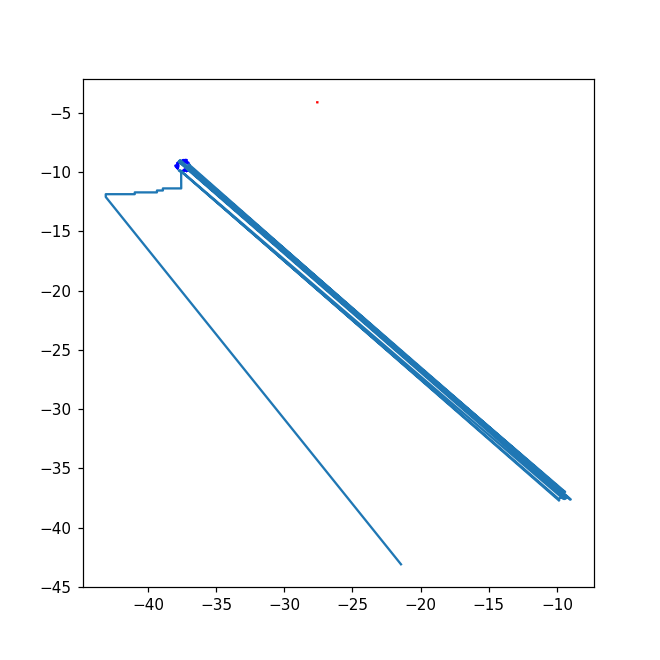

In [262]:
%matplotlib notebook
draw_primitives = 32
fig,ax = plt.subplots(1,1, figsize=(6,6))
for i,l in enumerate(lines):
    if i+1 > draw_primitives:
        break
    plt.plot(l[0], l[1], 'b')
plt.plot(lines[19499][0], lines[19499][1], 'r')
#for i,l in enumerate(arclines):
#    if i > draw_primitives:
#        break
#    plt.plot(l[0], l[1], 'r')
#for c in centers:
#    plt.scatter(c[0], c[1], s=10,c='g')

In [38]:
#write found linestrips to file for further processing in a more efficient language
#format: number_of_nodes_in_strip node1x node1y node2x node2y ... nodeNx nodeNy
#example: 4 1.1 1.1 2.2 2.2 3.3 3.3 4.4 4.4 2 11.11 22.22 6.6 7.7

outstr = ""
nodes_processed = 0
for k,ls in enumerate(lines):
    if k % 10000 == 0:
        print(f"Processed {k} linestrips (total {len(lines)}), processed {nodes_processed} nodes")
    outstr += f"{len(ls[0])} "
    for i in range(len(ls[0])):
        outstr += f"{ls[0][i]} {ls[1][i]} "
    nodes_processed += len(ls[0])
    outstr += "\n"

outfilename = "line_strips_fixedarcs.txt"
with open(outfilename, 'w') as outfile:
    outfile.write(outstr)

Processed 0 linestrips (total 273036), processed 0 nodes
Processed 10000 linestrips (total 273036), processed 182648 nodes
Processed 20000 linestrips (total 273036), processed 368272 nodes
Processed 30000 linestrips (total 273036), processed 553248 nodes
Processed 40000 linestrips (total 273036), processed 738560 nodes
Processed 50000 linestrips (total 273036), processed 921184 nodes
Processed 60000 linestrips (total 273036), processed 1104480 nodes
Processed 70000 linestrips (total 273036), processed 1289888 nodes
Processed 80000 linestrips (total 273036), processed 1474888 nodes
Processed 90000 linestrips (total 273036), processed 1660176 nodes
Processed 100000 linestrips (total 273036), processed 1842824 nodes
Processed 110000 linestrips (total 273036), processed 2026480 nodes
Processed 120000 linestrips (total 273036), processed 2211168 nodes
Processed 130000 linestrips (total 273036), processed 2396864 nodes
Processed 140000 linestrips (total 273036), processed 2581408 nodes
Proce

<IPython.core.display.Javascript object>


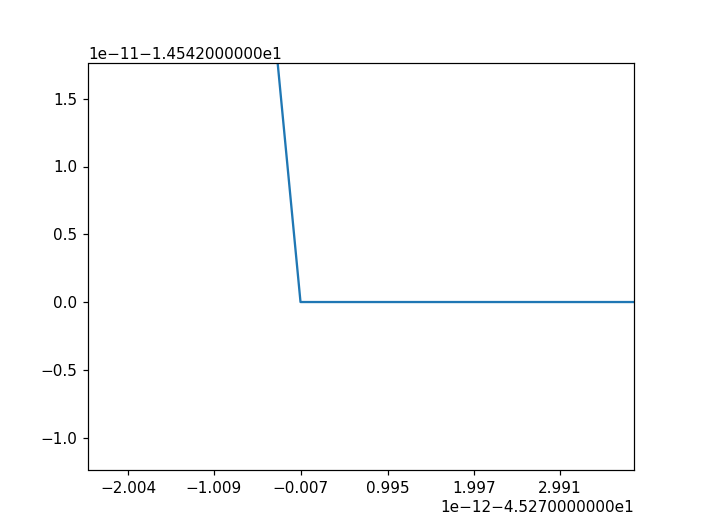

In [313]:
data = [-45.442000,-11.966000,-43.218000,-11.966000,-43.218000,-11.750000,-41.090000,-11.750000,-41.090000,-11.598000,-39.462000,-11.598000,-39.462000,-11.438000,-39.026000,-11.438000,-39.026000,-11.262000,-37.680000,-11.262000,-37.680000,-10.132500,-37.680132,-10.126219,-37.680527,-10.119949,-37.681184,-10.113701,-37.682102,-10.107486,-37.683279,-10.101314,-37.684714,-10.095198,-37.686404,-10.089147,-37.688346,-10.083172,-37.690536,-10.077283,-37.692970,-10.071492,-37.695645,-10.065807,-37.698556,-10.060240,-37.701698,-10.054799,-37.705064,-10.049494,-37.708649,-10.044336,-37.712448,-10.039331,-37.716453,-10.034491,-37.720656,-10.029822,-37.725052,-10.025333,-37.729632,-10.021032,-37.734387,-10.016927,-37.739311,-10.013024,-37.744393,-10.009332,-37.749626,-10.005855,-37.755000,-10.002600,-37.799550,-9.974328,-37.841577,-9.942427,-37.880788,-9.907121,-37.916907,-9.868657,-37.949681,-9.827307,-37.978880,-9.783359,-38.004298,-9.737122,-38.025759,-9.688920,-38.043111,-9.639091,-38.056233,-9.587985,-38.065032,-9.535960,-38.069447,-9.483382,-38.069447,-9.430618,-38.065032,-9.378040,-38.056233,-9.326015,-38.043111,-9.274909,-38.025759,-9.225080,-38.004298,-9.176878,-37.978880,-9.130641,-37.949681,-9.086693,-37.916907,-9.045343,-37.880788,-9.006879,-37.841577,-8.971573,-37.799550,-8.939672,-37.755000,-8.911400,-37.744393,-8.904668,-37.734386,-8.897073,-37.725050,-8.888667,-37.716451,-8.879509,-37.708647,-8.869663,-37.701695,-8.859200,-37.695643,-8.848191,-37.690534,-8.836714,-37.686402,-8.824850,-37.683278,-8.812682,-37.681183,-8.800295,-37.680132,-8.787776,-37.680132,-8.775214,-37.681183,-8.762695,-37.683278,-8.750308,-37.686402,-8.738140,-37.690534,-8.726276,-37.695643,-8.714799,-37.701695,-8.703790,-37.708647,-8.693327,-37.716451,-8.683481,-37.725050,-8.674323,-37.734386,-8.665917,-37.744393,-8.658322,-37.755000,-8.651590,-37.799550,-8.623318,-37.841577,-8.591418,-37.880788,-8.556112,-37.916907,-8.517649,-37.949681,-8.476299,-37.978879,-8.432352,-38.004298,-8.386115,-38.025759,-8.337913,-38.043111,-8.288085,-38.056233,-8.236979,-38.065032,-8.184955,-38.069447,-8.132377,-38.069447,-8.079613,-38.065032,-8.027035,-38.056233,-7.975011,-38.043111,-7.923905,-38.025759,-7.874077,-38.004298,-7.825875,-37.978879,-7.779638,-37.949681,-7.735691,-37.916907,-7.694341,-37.880788,-7.655878,-37.841577,-7.620572,-37.799550,-7.588672,-37.755000,-7.560400,-37.744393,-7.553668,-37.734386,-7.546073,-37.725050,-7.537667,-37.716451,-7.528509,-37.708647,-7.518663,-37.701695,-7.508200,-37.695643,-7.497191,-37.690534,-7.485714,-37.686402,-7.473850,-37.683278,-7.461682,-37.681183,-7.449295,-37.680132,-7.436776,-37.680132,-7.424214,-37.681183,-7.411695,-37.683278,-7.399308,-37.686402,-7.387140,-37.690534,-7.375276,-37.695643,-7.363799,-37.701695,-7.352790,-37.708647,-7.342327,-37.716451,-7.332481,-37.725050,-7.323323,-37.734386,-7.314917,-37.744393,-7.307322,-37.755000,-7.300590,-37.799550,-7.272318,-37.841577,-7.240418,-37.880788,-7.205112,-37.916907,-7.166649,-37.949681,-7.125299,-37.978879,-7.081352,-38.004298,-7.035115,-38.025759,-6.986913,-38.043111,-6.937085,-38.056233,-6.885979,-38.065032,-6.833955,-38.069447,-6.781377,-38.069447,-6.728613,-38.065032,-6.676035,-38.056233,-6.624011,-38.043111,-6.572905,-38.025759,-6.523077,-38.004298,-6.474875,-37.978879,-6.428638,-37.949681,-6.384691,-37.916907,-6.343341,-37.880788,-6.304878,-37.841577,-6.269572,-37.799550,-6.237672,-37.755000,-6.209400,-37.744393,-6.202668,-37.734386,-6.195073,-37.725050,-6.186667,-37.716451,-6.177509,-37.708647,-6.167663,-37.701695,-6.157200,-37.695643,-6.146191,-37.690534,-6.134714,-37.686402,-6.122850,-37.683278,-6.110682,-37.681183,-6.098295,-37.680132,-6.085776,-37.680132,-6.073214,-37.681183,-6.060695,-37.683278,-6.048308,-37.686402,-6.036140,-37.690534,-6.024276,-37.695643,-6.012799,-37.701695,-6.001790,-37.708647,-5.991327,-37.716451,-5.981481,-37.725050,-5.972323,-37.734386,-5.963917,-37.744393,-5.956322,-37.755000,-5.949590,-37.799550,-5.921318,-37.841577,-5.889418,-37.880788,-5.854112,-37.916907,-5.815649,-37.949681,-5.774299,-37.978879,-5.730352,-38.004298,-5.684115,-38.025759,-5.635913,-38.043111,-5.586085,-38.056233,-5.534979,-38.065032,-5.482955,-38.069447,-5.430377,-38.069447,-5.377613,-38.065032,-5.325035,-38.056233,-5.273011,-38.043111,-5.221905,-38.025759,-5.172077,-38.004298,-5.123875,-37.978879,-5.077638,-37.949681,-5.033691,-37.916907,-4.992341,-37.880788,-4.953878,-37.841577,-4.918572,-37.799550,-4.886672,-37.755000,-4.858400,-37.744393,-4.851668,-37.734386,-4.844073,-37.725050,-4.835667,-37.716451,-4.826509,-37.708647,-4.816663,-37.701695,-4.806200,-37.695643,-4.795191,-37.690534,-4.783714,-37.686402,-4.771850,-37.683278,-4.759682,-37.681183,-4.747295,-37.680132,-4.734776,-37.680132,-4.722214,-37.681183,-4.709695,-37.683278,-4.697308,-37.686402,-4.685140,-37.690534,-4.673276,-37.695643,-4.661799,-37.701695,-4.650790,-37.708647,-4.640327,-37.716451,-4.630481,-37.725050,-4.621323,-37.734386,-4.612917,-37.744393,-4.605322,-37.755000,-4.598590,-37.799550,-4.570318,-37.841577,-4.538418,-37.880788,-4.503112,-37.916907,-4.464649,-37.949681,-4.423299,-37.978879,-4.379352,-38.004298,-4.333115,-38.025759,-4.284913,-38.043111,-4.235085,-38.056233,-4.183979,-38.065032,-4.131955,-38.069447,-4.079377,-38.069447,-4.026613,-38.065032,-3.974035,-38.056233,-3.922011,-38.043111,-3.870905,-38.025759,-3.821077,-38.004298,-3.772875,-37.978879,-3.726638,-37.949681,-3.682691,-37.916907,-3.641341,-37.880788,-3.602878,-37.841577,-3.567572,-37.799550,-3.535672,-37.755000,-3.507400,-37.744393,-3.500669,-37.734386,-3.493074,-37.725051,-3.484668,-37.716451,-3.475511,-37.708648,-3.465666,-37.701695,-3.455202,-37.695643,-3.444194,-37.690534,-3.432718,-37.686402,-3.420854,-37.683278,-3.408686,-37.681183,-3.396300,-37.680132,-3.383781,-37.680132,-3.371219,-37.681183,-3.358700,-37.683278,-3.346314,-37.686402,-3.334146,-37.690534,-3.322282,-37.695643,-3.310806,-37.701695,-3.299798,-37.708648,-3.289334,-37.716451,-3.279489,-37.725051,-3.270332,-37.734386,-3.261926,-37.744393,-3.254331,-37.755000,-3.247600,-37.799550,-3.219328,-37.841577,-3.187427,-37.880788,-3.152121,-37.916907,-3.113657,-37.949681,-3.072307,-37.978880,-3.028359,-38.004298,-2.982122,-38.025759,-2.933920,-38.043111,-2.884091,-38.056233,-2.832985,-38.065032,-2.780960,-38.069447,-2.728382,-38.069447,-2.675618,-38.065032,-2.623040,-38.056233,-2.571015,-38.043111,-2.519909,-38.025759,-2.470080,-38.004298,-2.421878,-37.978880,-2.375641,-37.949681,-2.331693,-37.916907,-2.290343,-37.880788,-2.251879,-37.841577,-2.216573,-37.799550,-2.184672,-37.755000,-2.156400,-37.744393,-2.149669,-37.734386,-2.142074,-37.725051,-2.133668,-37.716451,-2.124511,-37.708648,-2.114666,-37.701695,-2.104202,-37.695643,-2.093194,-37.690534,-2.081718,-37.686402,-2.069854,-37.683278,-2.057686,-37.681183,-2.045300,-37.680132,-2.032781,-37.680132,-2.020219,-37.681183,-2.007700,-37.683278,-1.995314,-37.686402,-1.983146,-37.690534,-1.971282,-37.695643,-1.959806,-37.701695,-1.948798,-37.708648,-1.938334,-37.716451,-1.928489,-37.725051,-1.919332,-37.734386,-1.910926,-37.744393,-1.903331,-37.755000,-1.896600,-37.799550,-1.868328,-37.841577,-1.836427,-37.880788,-1.801121,-37.916907,-1.762658,-37.949681,-1.721308,-37.978880,-1.677360,-38.004298,-1.631123,-38.025759,-1.582921,-38.043111,-1.533092,-38.056233,-1.481987,-38.065032,-1.429962,-38.069447,-1.377384,-38.069447,-1.324620,-38.065032,-1.272042,-38.056233,-1.220017,-38.043111,-1.168912,-38.025759,-1.119083,-38.004298,-1.070881,-37.978880,-1.024644,-37.949681,-0.980696,-37.916907,-0.939346,-37.880788,-0.900883,-37.841577,-0.865577,-37.799550,-0.833676,-37.755000,-0.805404,-37.744393,-0.798673,-37.734386,-0.791077,-37.725050,-0.782671,-37.716451,-0.773513,-37.708647,-0.763668,-37.701695,-0.753204,-37.695643,-0.742195,-37.690534,-0.730719,-37.686402,-0.718855,-37.683278,-0.706687,-37.681183,-0.694300,-37.680132,-0.681781,-37.680132,-0.669219,-37.681183,-0.656700,-37.683278,-0.644313,-37.686402,-0.632145,-37.690534,-0.620281,-37.695643,-0.608805,-37.701695,-0.597796,-37.708647,-0.587332,-37.716451,-0.577487,-37.725050,-0.568329,-37.734386,-0.559923,-37.744393,-0.552327,-37.755000,-0.545596,-37.758309,-0.543674,-37.761606,-0.541733,-37.764892,-0.539771,-37.768165,-0.537789,-37.771426,-0.535787,-37.774675,-0.533765,-37.777911,-0.531723,-37.781135,-0.529662,-37.784346,-0.527580,-37.787544,-0.525479,-37.790729,-0.523359,-37.793901,-0.521219,-37.797061,-0.519060,-37.800206,-0.516881,-37.803339,-0.514683,-37.806458,-0.512466,-37.809563,-0.510230,-37.812654,-0.507975,-37.815732,-0.505701,-37.818796,-0.503409,-37.821845,-0.501097,-37.824880,-0.498767,-37.827901,-0.496419,-37.830908,-0.494051,-37.833900,-0.491666,-37.752600,-0.390206,-37.710100,-0.395434,-37.609900,-0.416714,-37.549100,-0.102907,-37.554973,-0.096315,-37.560447,-0.089388,-37.565504,-0.082151,-37.570125,-0.074628,-37.574295,-0.066846,-37.578000,-0.058832,-37.581226,-0.050614,-37.583962,-0.042220,-37.586199,-0.033679,-37.587929,-0.025022,-37.589146,-0.016277,-37.589845,-0.007476,-37.590025,0.001351,-37.589684,0.010173,-37.588825,0.018960,-37.587449,0.027681,-37.585562,0.036305,-37.583169,0.044804,-37.580281,0.053147,-37.576906,0.061305,-37.573056,0.069250,-37.568745,0.076955,-37.563987,0.084392,-37.558799,0.091536,-37.553200,0.098362,-37.746100,0.329874,-37.725100,0.382372,-37.638300,0.458982,-37.641100,0.465414,-37.624200,0.472370,-37.621600,0.465842,-37.647400,0.431668,-37.716000,0.355453,-37.474600,0.145966,-37.465954,0.147745,-37.457218,0.149013,-37.448423,0.149765,-37.439599,0.149999,-37.430777,0.149713,-37.421986,0.148909,-37.413258,0.147590,-37.404623,0.145759,-37.396110,0.143424,-37.387750,0.140593,-37.379570,0.137274,-37.371599,0.133481,-37.363866,0.129225,-37.356396,0.124522,-37.349215,0.119388,-37.342349,0.113840,-37.335821,0.107898,-37.329654,0.101583,-37.323869,0.094916,-37.318486,0.087920,-37.313523,0.080620,-37.308998,0.073041,-37.304927,0.065209,-37.301323,0.057150,-37.298200,0.048894,-37.001300,0.100133,-36.966300,0.055678,-36.943400,-0.057745,-36.936400,-0.058554,-36.938800,-0.076695,-36.945800,-0.075636,-36.962500,-0.036234,-36.994200,0.061260,-37.296300,-0.043058,-37.299086,-0.051435,-37.302359,-0.059632,-37.306109,-0.067624,-37.310321,-0.075381,-37.314983,-0.082876,-37.320077,-0.090085,-37.325586,-0.096982,-37.331491,-0.103544,-37.337772,-0.109746,-37.344406,-0.115569,-37.351371,-0.120992,-37.358643,-0.125996,-37.366196,-0.130564,-37.374005,-0.134680,-37.382042,-0.138329,-37.390280,-0.141500,-37.398690,-0.144182,-37.407243,-0.146364,-37.415910,-0.148040,-37.424660,-0.149203,-37.433463,-0.149850,-37.442290,-0.149978,-37.451108,-0.149587,-37.459888,-0.148679,-37.468600,-0.147256,-37.572600,-0.430007,-37.628600,-0.438050,-37.738300,-0.401237,-37.813500,-0.502356,-37.811170,-0.504078,-37.808831,-0.505790,-37.806485,-0.507491,-37.804131,-0.509181,-37.801770,-0.510860,-37.799401,-0.512529,-37.797024,-0.514186,-37.794640,-0.515833,-37.792248,-0.517469,-37.789849,-0.519094,-37.787442,-0.520708,-37.785028,-0.522311,-37.782607,-0.523903,-37.780178,-0.525483,-37.777742,-0.527053,-37.775299,-0.528612,-37.772849,-0.530159,-37.770392,-0.531695,-37.767928,-0.533220,-37.765457,-0.534734,-37.762979,-0.536236,-37.760495,-0.537727,-37.758003,-0.539207,-37.755505,-0.540675,-37.753000,-0.542132,-37.742110,-0.549043,-37.731837,-0.556841,-37.722252,-0.565471,-37.713423,-0.574873,-37.705411,-0.584981,-37.698274,-0.595724,-37.692060,-0.607026,-37.686814,-0.618809,-37.682573,-0.630989,-37.679365,-0.643482,-37.677214,-0.656199,-37.676135,-0.669051,-37.676135,-0.681949,-37.677214,-0.694801,-37.679365,-0.707518,-37.682573,-0.720011,-37.686814,-0.732191,-37.692060,-0.743974,-37.698274,-0.755276,-37.705411,-0.766019,-37.713423,-0.776127,-37.722252,-0.785529,-37.731837,-0.794159,-37.742110,-0.801957,-37.753000,-0.808868,-37.797267,-0.836960,-37.839027,-0.868658,-37.877989,-0.903740,-37.913879,-0.941958,-37.946445,-0.983046,-37.975458,-1.026715,-38.000716,-1.072658,-38.022040,-1.120553,-38.039282,-1.170065,-38.052320,-1.220846,-38.061064,-1.272540,-38.065451,-1.324785,-38.065451,-1.377213,-38.061064,-1.429458,-38.052320,-1.481152,-38.039282,-1.531933,-38.022040,-1.581445,-38.000716,-1.629340,-37.975458,-1.675283,-37.946445,-1.718952,-37.913879,-1.760040,-37.877989,-1.798258,-37.839027,-1.833340,-37.797267,-1.865038,-37.753000,-1.893130,-37.742110,-1.900041,-37.731837,-1.907839,-37.722252,-1.916470,-37.713423,-1.925872,-37.705411,-1.935980,-37.698274,-1.946723,-37.692060,-1.958025,-37.686814,-1.969808,-37.682573,-1.981989,-37.679365,-1.994481,-37.677214,-2.007198,-37.676135,-2.020051,-37.676135,-2.032949,-37.677214,-2.045802,-37.679365,-2.058519,-37.682573,-2.071011,-37.686814,-2.083192,-37.692060,-2.094975,-37.698274,-2.106277,-37.705411,-2.117020,-37.713423,-2.127128,-37.722252,-2.136530,-37.731837,-2.145161,-37.742110,-2.152959,-37.753000,-2.159870,-37.797267,-2.187962,-37.839027,-2.219660,-37.877989,-2.254741,-37.913879,-2.292960,-37.946445,-2.334047,-37.975458,-2.377716,-38.000716,-2.423659,-38.022040,-2.471555,-38.039282,-2.521067,-38.052320,-2.571848,-38.061064,-2.623542,-38.065451,-2.675786,-38.065451,-2.728214,-38.061064,-2.780458,-38.052320,-2.832152,-38.039282,-2.882933,-38.022040,-2.932445,-38.000716,-2.980341,-37.975458,-3.026284,-37.946445,-3.069953,-37.913879,-3.111040,-37.877989,-3.149259,-37.839027,-3.184340,-37.797267,-3.216038,-37.753000,-3.244130,-37.742110,-3.251041,-37.731837,-3.258839,-37.722252,-3.267470,-37.713423,-3.276872,-37.705411,-3.286980,-37.698274,-3.297723,-37.692060,-3.309025,-37.686814,-3.320808,-37.682573,-3.332989,-37.679365,-3.345481,-37.677214,-3.358198,-37.676135,-3.371051,-37.676135,-3.383949,-37.677214,-3.396802,-37.679365,-3.409519,-37.682573,-3.422011,-37.686814,-3.434192,-37.692060,-3.445975,-37.698274,-3.457277,-37.705411,-3.468020,-37.713423,-3.478128,-37.722252,-3.487530,-37.731837,-3.496161,-37.742110,-3.503959,-37.753000,-3.510870,-37.797267,-3.538962,-37.839027,-3.570660,-37.877989,-3.605741,-37.913879,-3.643960,-37.946445,-3.685047,-37.975458,-3.728716,-38.000716,-3.774659,-38.022040,-3.822555,-38.039282,-3.872067,-38.052320,-3.922848,-38.061064,-3.974542,-38.065451,-4.026786,-38.065451,-4.079214,-38.061064,-4.131458,-38.052320,-4.183152,-38.039282,-4.233933,-38.022040,-4.283445,-38.000716,-4.331341,-37.975458,-4.377284,-37.946445,-4.420953,-37.913879,-4.462040,-37.877989,-4.500259,-37.839027,-4.535340,-37.797267,-4.567038,-37.753000,-4.595130,-37.742110,-4.602041,-37.731837,-4.609839,-37.722252,-4.618470,-37.713423,-4.627872,-37.705411,-4.637980,-37.698274,-4.648723,-37.692060,-4.660025,-37.686814,-4.671808,-37.682573,-4.683989,-37.679365,-4.696481,-37.677214,-4.709198,-37.676135,-4.722051,-37.676135,-4.734949,-37.677214,-4.747802,-37.679365,-4.760519,-37.682573,-4.773011,-37.686814,-4.785192,-37.692060,-4.796975,-37.698274,-4.808277,-37.705411,-4.819020,-37.713423,-4.829128,-37.722252,-4.838530,-37.731837,-4.847161,-37.742110,-4.854959,-37.753000,-4.861870,-37.797267,-4.889962,-37.839027,-4.921660,-37.877989,-4.956741,-37.913879,-4.994960,-37.946445,-5.036047,-37.975458,-5.079716,-38.000716,-5.125659,-38.022040,-5.173555,-38.039282,-5.223067,-38.052320,-5.273848,-38.061064,-5.325542,-38.065451,-5.377786,-38.065451,-5.430214,-38.061064,-5.482458,-38.052320,-5.534152,-38.039282,-5.584933,-38.022040,-5.634445,-38.000716,-5.682341,-37.975458,-5.728284,-37.946445,-5.771953,-37.913879,-5.813040,-37.877989,-5.851259,-37.839027,-5.886340,-37.797267,-5.918038,-37.753000,-5.946130,-37.742110,-5.953041,-37.731837,-5.960839,-37.722252,-5.969470,-37.713423,-5.978872,-37.705411,-5.988980,-37.698274,-5.999723,-37.692060,-6.011025,-37.686814,-6.022808,-37.682573,-6.034989,-37.679365,-6.047481,-37.677214,-6.060198,-37.676135,-6.073051,-37.676135,-6.085949,-37.677214,-6.098802,-37.679365,-6.111519,-37.682573,-6.124011,-37.686814,-6.136192,-37.692060,-6.147975,-37.698274,-6.159277,-37.705411,-6.170020,-37.713423,-6.180128,-37.722252,-6.189530,-37.731837,-6.198161,-37.742110,-6.205959,-37.753000,-6.212870,-37.797267,-6.240962,-37.839027,-6.272660,-37.877989,-6.307741,-37.913879,-6.345960,-37.946445,-6.387047,-37.975458,-6.430716,-38.000716,-6.476659,-38.022040,-6.524555,-38.039282,-6.574067,-38.052320,-6.624848,-38.061064,-6.676542,-38.065451,-6.728786,-38.065451,-6.781214,-38.061064,-6.833458,-38.052320,-6.885152,-38.039282,-6.935933,-38.022040,-6.985445,-38.000716,-7.033341,-37.975458,-7.079284,-37.946445,-7.122953,-37.913879,-7.164040,-37.877989,-7.202259,-37.839027,-7.237340,-37.797267,-7.269038,-37.753000,-7.297130,-37.742110,-7.304041,-37.731837,-7.311839,-37.722252,-7.320470,-37.713423,-7.329872,-37.705411,-7.339980,-37.698274,-7.350723,-37.692060,-7.362025,-37.686814,-7.373808,-37.682573,-7.385989,-37.679365,-7.398481,-37.677214,-7.411198,-37.676135,-7.424051,-37.676135,-7.436949,-37.677214,-7.449802,-37.679365,-7.462519,-37.682573,-7.475011,-37.686814,-7.487192,-37.692060,-7.498975,-37.698274,-7.510277,-37.705411,-7.521020,-37.713423,-7.531128,-37.722252,-7.540530,-37.731837,-7.549161,-37.742110,-7.556959,-37.753000,-7.563870,-37.797267,-7.591962,-37.839027,-7.623660,-37.877989,-7.658741,-37.913879,-7.696960,-37.946445,-7.738047,-37.975458,-7.781716,-38.000716,-7.827659,-38.022040,-7.875555,-38.039282,-7.925067,-38.052320,-7.975848,-38.061064,-8.027542,-38.065451,-8.079786,-38.065451,-8.132214,-38.061064,-8.184458,-38.052320,-8.236152,-38.039282,-8.286933,-38.022040,-8.336445,-38.000716,-8.384341,-37.975458,-8.430284,-37.946445,-8.473953,-37.913879,-8.515040,-37.877989,-8.553259,-37.839027,-8.588340,-37.797267,-8.620038,-37.753000,-8.648130,-37.742110,-8.655041,-37.731837,-8.662839,-37.722252,-8.671470,-37.713423,-8.680872,-37.705411,-8.690980,-37.698274,-8.701723,-37.692060,-8.713025,-37.686814,-8.724808,-37.682573,-8.736989,-37.679365,-8.749481,-37.677214,-8.762198,-37.676135,-8.775051,-37.676135,-8.787949,-37.677214,-8.800802,-37.679365,-8.813519,-37.682573,-8.826011,-37.686814,-8.838192,-37.692060,-8.849975,-37.698274,-8.861277,-37.705411,-8.872020,-37.713423,-8.882128,-37.722252,-8.891530,-37.731837,-8.900161,-37.742110,-8.907959,-37.753000,-8.914870,-37.797267,-8.942962,-37.839027,-8.974660,-37.877989,-9.009741,-37.913879,-9.047960,-37.946445,-9.089047,-37.975458,-9.132716,-38.000716,-9.178659,-38.022040,-9.226555,-38.039282,-9.276067,-38.052320,-9.326848,-38.061064,-9.378542,-38.065451,-9.430786,-38.065451,-9.483214,-38.061064,-9.535458,-38.052320,-9.587152,-38.039282,-9.637933,-38.022040,-9.687445,-38.000716,-9.735341,-37.975458,-9.781284,-37.946445,-9.824953,-37.913879,-9.866040,-37.877989,-9.904259,-37.839027,-9.939340,-37.797267,-9.971038,-37.753000,-9.999130,-37.747480,-10.002468,-37.742105,-10.006035,-37.736884,-10.009824,-37.731826,-10.013829,-37.726941,-10.018042,-37.722237,-10.022457,-37.717722,-10.027065,-37.713404,-10.031858,-37.709291,-10.036827,-37.705390,-10.041965,-37.701707,-10.047262,-37.698250,-10.052709,-37.695025,-10.058296,-37.692037,-10.064013,-37.689290,-10.069850,-37.686791,-10.075798,-37.684544,-10.081845,-37.682552,-10.087981,-37.680819,-10.094195,-37.679349,-10.100476,-37.678143,-10.106813,-37.677203,-10.113196,-37.676532,-10.119612,-37.676131,-10.126050,-37.676000,-10.132500,-37.676000,-11.266000,-39.022000,-11.266000,-39.022000,-11.442000,-39.458000,-11.442000,-39.458000,-11.602000,-41.086000,-11.602000,-41.086000,-11.754000,-43.214000,-11.754000,-43.214000,-11.970000,-45.438000,-11.970000,-45.438000,-12.100000,-45.438000,-14.425200,-45.371000,-14.496200,-45.366821,-14.492633,-45.362333,-14.489463,-45.357574,-14.486716,-45.352584,-14.484417,-45.347404,-14.482583,-45.342078,-14.481231,-45.336651,-14.480371,-45.331168,-14.480012,-45.325676,-14.480155,-45.320219,-14.480800,-45.314844,-14.481941,-45.309596,-14.483569,-45.304519,-14.485671,-45.299656,-14.488227,-45.295046,-14.491218,-45.290730,-14.494618,-45.286742,-14.498398,-45.283117,-14.502527,-45.279885,-14.506970,-45.277072,-14.511691,-45.274703,-14.516648,-45.272798,-14.521802,-45.271371,-14.527108,-45.270436,-14.532523,-45.270000,-14.538000,-45.260000,-14.538000,-45.259298,-14.530657,-45.257700,-14.523455,-45.255231,-14.516504,-45.251928,-14.509908,-45.247841,-14.503767,-45.243032,-14.498173,-45.237573,-14.493212,-45.231547,-14.488957,-45.225045,-14.485474,-45.218164,-14.482814,-45.211009,-14.481018,-45.203688,-14.480113,-45.196312,-14.480113,-45.188991,-14.481018,-45.181836,-14.482814,-45.174955,-14.485474,-45.168453,-14.488957,-45.162427,-14.493212,-45.156968,-14.498173,-45.152159,-14.503767,-45.148072,-14.509908,-45.144769,-14.516504,-45.142300,-14.523455,-45.140702,-14.530657,-45.140000,-14.538000,-45.140000,-14.542000,-45.140702,-14.549343,-45.142300,-14.556545,-45.144769,-14.563496,-45.148072,-14.570092,-45.152159,-14.576233,-45.156968,-14.581827,-45.162427,-14.586788,-45.168453,-14.591043,-45.174955,-14.594526,-45.181836,-14.597186,-45.188991,-14.598982,-45.196312,-14.599887,-45.203688,-14.599887,-45.211009,-14.598982,-45.218164,-14.597186,-45.225045,-14.594526,-45.231547,-14.591043,-45.237573,-14.586788,-45.243032,-14.581827,-45.247841,-14.576233,-45.251928,-14.570092,-45.255231,-14.563496,-45.257700,-14.556545,-45.259298,-14.549343,-45.260000,-14.542000,-45.270000,-14.542000,-45.270087,-14.536187,-45.270736,-14.530409,-45.271942,-14.524722,-45.273692,-14.519177,-45.275970,-14.513829,-45.278755,-14.508725,-45.282022,-14.503916,-45.285738,-14.499444,-45.289869,-14.495354,-45.294377,-14.491682,-45.299219,-14.488464,-45.304350,-14.485730,-45.309721,-14.483505,-45.315282,-14.481810,-45.320982,-14.480661,-45.326765,-14.480069,-45.332579,-14.480040,-45.338368,-14.480573,-45.344079,-14.481665,-45.349657,-14.483303,-45.355051,-14.485474,-45.360209,-14.488156,-45.365083,-14.491326,-45.369628,-14.494951,-45.373800,-14.499000,-45.442000,-14.425200,-45.442000,-12.100000,-45.442000,-12.100000,-45.442000,-11.966000]
xs = data[::2]
ys = data[1::2]
%matplotlib notebook
plt.plot(xs,ys)
plt.scatter(data[0], data[1], c='g')
plt.scatter(data[-2], data[-1], c='r')

In [ ]:
45.27

### fixing redundant bondpads

In [285]:
#index 170517
#arc
#4.06997,34.422
#4.13,34.48
#4.17382,34.379
genArcPoints([4.06997,34.422], [4.13,34.48], [4.17382,34.379])

alpha: 2.423895600768499
alpha corrected: 2.423895600768499


([array([ 4.07123797, 34.40754201]),
  array([ 4.07593912, 34.39381101]),
  array([ 4.0837986 , 34.38160978]),
  array([ 4.09435691, 34.37165169]),
  array([ 4.10699673, 34.36451894]),
  array([ 4.12097908, 34.36062855]),
  array([ 4.13548647, 34.36020797]),
  array([ 4.14967072, 34.36328179]),
  array([ 4.16270253, 34.36967031])],
 array([ 4.12995941, 34.41997649]))

In [307]:
#5.12997,38.382
#5.07,38.44
#5.02618,38.339
genArcPoints([5.12997,38.382], [5.07,38.44], [5.02618,38.339])

alpha: -2.42289617510469
alpha corrected: -2.42289617510469


([array([ 5.12869939, 38.36755267]),
  array([ 5.12399961, 38.35383218]),
  array([ 5.1161452 , 38.34164005]),
  array([ 5.105595  , 38.33168851]),
  array([ 5.09296532, 38.32455892]),
  array([ 5.07899397, 38.32066776]),
  array([ 5.06449711, 38.32024235]),
  array([ 5.05032163, 38.32330753]),
  array([ 5.0372956 , 38.32968425])],
 array([ 5.06999833, 38.37999482]))

In [316]:
#-45.27,-14.542
#-45.33,-14.6
#-45.3738,-14.499
genArcPoints([-45.27,-14.542], [-45.33,-14.6], [-45.3738,-14.499])

alpha: 2.423062692458788
corrected alpha: 2.423062692458788


([array([-45.27127017, -14.52755089]),
  array([-45.27597018, -14.51382865]),
  array([-45.28382544, -14.50163501]),
  array([-45.29437699, -14.49168238]),
  array([-45.30700835, -14.48455226]),
  array([-45.32098154, -14.48066123]),
  array([-45.33548015, -14.48023662]),
  array([-45.3496571 , -14.48330324]),
  array([-45.36268408, -14.48968193])],
 array([-45.32997462, -14.53999177]))

In [341]:
#-40.47,23.592
#-40.53,23.65
#-40.5738,23.549
genArcPoints([-40.47,23.592], [-40.53,23.65], [-40.5738,23.549])

alpha: -2.4230626924587835
Corrected alpha (case 5)
corrected alpha: 3.8601226147208028


([array([-40.47516916,  23.6144325 ]),
  array([-40.48840373,  23.6332682 ]),
  array([-40.50775606,  23.64573514]),
  array([-40.53037817,  23.64999865]),
  array([-40.55294089,  23.64543128]),
  array([-40.5721238 ,  23.63270518]),
  array([-40.58510385,  23.61369319]),
  array([-40.58997083,  23.59119319]),
  array([-40.58600851,  23.56851639])],
 array([-40.52997462,  23.58999177]))

In [348]:
#-42.87,19.632
#-42.93,19.69
#-42.9738,19.589
genArcPoints([-42.87,19.632], [-42.93,19.69], [-42.9738,19.589], verbose=True)

alpha: -2.4230626924588474
Corrected alpha (case 5)
corrected alpha: 3.860122614720739


([array([-42.87516916,  19.6544325 ]),
  array([-42.88840373,  19.6732682 ]),
  array([-42.90775606,  19.68573514]),
  array([-42.93037817,  19.68999865]),
  array([-42.95294089,  19.68543128]),
  array([-42.9721238 ,  19.67270518]),
  array([-42.98510385,  19.65369319]),
  array([-42.98997083,  19.63119319]),
  array([-42.98600851,  19.60851639])],
 array([-42.92997462,  19.62999177]))

In [356]:
#-42.87,15.462
#-42.93,15.52
#-42.9738,15.419
genArcPoints([-42.87,15.462], [-42.93,15.52], [-42.9738,15.419], verbose=True)

alpha: -2.4230626924587937
Corrected alpha (case 5)
corrected alpha: 3.8601226147207925


([array([-42.87516916,  15.4844325 ]),
  array([-42.88840373,  15.5032682 ]),
  array([-42.90775606,  15.51573514]),
  array([-42.93037817,  15.51999865]),
  array([-42.95294089,  15.51543128]),
  array([-42.9721238 ,  15.50270518]),
  array([-42.98510385,  15.48369319]),
  array([-42.98997083,  15.46119319]),
  array([-42.98600851,  15.43851639])],
 array([-42.92997462,  15.45999177]))

In [358]:
#-42.87,15.672
#-42.93,15.73
#-42.9738,15.629
genArcPoints([-42.87,15.672], [-42.93,15.73], [-42.9738,15.629], verbose=True)

alpha: -2.423062692458826
Corrected alpha (case 5)
corrected alpha: 3.86012261472076


([array([-42.87516916,  15.6944325 ]),
  array([-42.88840373,  15.7132682 ]),
  array([-42.90775606,  15.72573514]),
  array([-42.93037817,  15.72999865]),
  array([-42.95294089,  15.72543128]),
  array([-42.9721238 ,  15.71270518]),
  array([-42.98510385,  15.69369319]),
  array([-42.98997083,  15.67119319]),
  array([-42.98600851,  15.64851639])],
 array([-42.92997462,  15.66999177]))

In [360]:
#-42.87,19.422
#-42.93,19.48
#-42.9738,19.379
genArcPoints([-42.87,19.422], [-42.93,19.48], [-42.9738,19.379], verbose=True)

alpha: -2.4230626924587937
Corrected alpha (case 5)
corrected alpha: 3.8601226147207925


([array([-42.87516916,  19.4444325 ]),
  array([-42.88840373,  19.4632682 ]),
  array([-42.90775606,  19.47573514]),
  array([-42.93037817,  19.47999865]),
  array([-42.95294089,  19.47543128]),
  array([-42.9721238 ,  19.46270518]),
  array([-42.98510385,  19.44369319]),
  array([-42.98997083,  19.42119319]),
  array([-42.98600851,  19.39851639])],
 array([-42.92997462,  19.41999177]))

In [363]:
#-41.53,23.592
#-41.47,23.65
#-41.4262,23.549
genArcPoints([-41.53,23.592], [-41.47,23.65], [-41.4262,23.549], verbose=True)

alpha: 2.4230626924587835
Corrected alpha (case 6)
corrected alpha: -3.8601226147208028


([array([-41.52483084,  23.6144325 ]),
  array([-41.51159627,  23.6332682 ]),
  array([-41.49224394,  23.64573514]),
  array([-41.46962183,  23.64999865]),
  array([-41.44705911,  23.64543128]),
  array([-41.4278762 ,  23.63270518]),
  array([-41.41489615,  23.61369319]),
  array([-41.41002917,  23.59119319]),
  array([-41.41399149,  23.56851639])],
 array([-41.47002538,  23.58999177]))

In [365]:
#-42.87,16.092
#-42.93,16.15
#-42.9738,16.049
genArcPoints([-42.87,16.092], [-42.93,16.15], [-42.9738,16.049], verbose=True)

alpha: -2.4230626924587937
Corrected alpha (case 5)
corrected alpha: 3.8601226147207925


([array([-42.87516916,  16.1144325 ]),
  array([-42.88840373,  16.1332682 ]),
  array([-42.90775606,  16.14573514]),
  array([-42.93037817,  16.14999865]),
  array([-42.95294089,  16.14543128]),
  array([-42.9721238 ,  16.13270518]),
  array([-42.98510385,  16.11369319]),
  array([-42.98997083,  16.09119319]),
  array([-42.98600851,  16.06851639])],
 array([-42.92997462,  16.08999177]))

In [368]:
#36.33,-29.542
#36.27,-29.6
#36.2262,-29.499
genArcPoints([36.33,-29.542], [36.27,-29.6], [36.2262,-29.499], verbose=True)

alpha: 2.423062692458858
Corrected alpha (case 6)
corrected alpha: -3.860122614720728


([array([ 36.32483084, -29.5644325 ]),
  array([ 36.31159627, -29.5832682 ]),
  array([ 36.29224394, -29.59573514]),
  array([ 36.26962183, -29.59999865]),
  array([ 36.24705911, -29.59543128]),
  array([ 36.2278762 , -29.58270518]),
  array([ 36.21489615, -29.56369319]),
  array([ 36.21002917, -29.54119319]),
  array([ 36.21399149, -29.51851639])],
 array([ 36.27002538, -29.53999177]))

In [370]:
#35.27,-25.162
#35.33,-25.22
#35.3738,-25.119
genArcPoints([35.27,-25.162], [35.33,-25.22], [35.3738,-25.119], verbose=True)

alpha: -2.4230626924587835
Corrected alpha (case 5)
corrected alpha: 3.8601226147208028


([array([ 35.27516916, -25.1844325 ]),
  array([ 35.28840373, -25.2032682 ]),
  array([ 35.30775606, -25.21573514]),
  array([ 35.33037817, -25.21999865]),
  array([ 35.35294089, -25.21543128]),
  array([ 35.3721238 , -25.20270518]),
  array([ 35.38510385, -25.18369319]),
  array([ 35.38997083, -25.16119319]),
  array([ 35.38600851, -25.13851639])],
 array([ 35.32997462, -25.15999177]))

In [94]:
#0.329967,34.422
#0.27,34.48
#0.226183,34.379
genArcPoints([0.329967,34.422], [0.27,34.48], [0.226183,34.379], verbose=True)

alpha: -2.42279618106908
corrected alpha: -2.42279618106908


([array([ 0.32869613, 34.40755374]),
  array([ 0.32399648, 34.3938343 ]),
  array([ 0.31614258, 34.38164308]),
  array([ 0.30559319, 34.3716922 ]),
  array([ 0.29296453, 34.36456292]),
  array([ 0.27899427, 34.36067168]),
  array([ 0.26449847, 34.36024578]),
  array([ 0.25032386, 34.3633101 ]),
  array([ 0.23729842, 34.36968565])],
 array([ 0.26999711, 34.41999665]))

In [101]:
#0.329967,30.252
#0.27,30.31
#0.226183,30.209
genArcPoints([0.329967,30.252], [0.27,30.31], [0.226183,30.209], verbose=True)

alpha: -2.4227961810688745
Corrected alpha (case 7)
corrected alpha: 3.8603891261107117


([array([ 0.32479938, 30.27443254]),
  array([ 0.31156571, 30.2932685 ]),
  array([ 0.29221379, 30.30573551]),
  array([ 0.26959192, 30.30999863]),
  array([ 0.24702969, 30.30543039]),
  array([ 0.2278479 , 30.29270316]),
  array([ 0.21486982, 30.2736902 ]),
  array([ 0.21000563, 30.25118992]),
  array([ 0.21397124, 30.228514  ])],
 array([ 0.26999711, 30.24999665]))

In [108]:
#0.329967,-33.082
#0.27,-33.14
#0.226183,-33.039
genArcPoints([0.329967,-33.082], [0.27,-33.14], [0.226183,-33.039], verbose=True)

alpha: 2.4227961810686685
Corrected alpha (case 8)
corrected alpha: -3.860389126110918


([array([  0.32479938, -33.10443254]),
  array([  0.31156571, -33.1232685 ]),
  array([  0.29221379, -33.13573551]),
  array([  0.26959192, -33.13999863]),
  array([  0.24702969, -33.13543039]),
  array([  0.2278479 , -33.12270316]),
  array([  0.21486982, -33.1036902 ]),
  array([  0.21000563, -33.08118992]),
  array([  0.21397124, -33.058514  ])],
 array([  0.26999711, -33.07999665]))

In [114]:
#0.329967,-36.832
#0.27,-36.89
#0.226183,-36.789
genArcPoints([0.329967,-36.832], [0.27,-36.89], [0.226183,-36.789], verbose=True)

alpha: 2.4227961810686685
Corrected alpha (case 8)
corrected alpha: -3.860389126110918


([array([  0.32479938, -36.85443254]),
  array([  0.31156571, -36.8732685 ]),
  array([  0.29221379, -36.88573551]),
  array([  0.26959192, -36.88999863]),
  array([  0.24702969, -36.88543039]),
  array([  0.2278479 , -36.87270316]),
  array([  0.21486982, -36.8536902 ]),
  array([  0.21000563, -36.83118992]),
  array([  0.21397124, -36.808514  ])],
 array([  0.26999711, -36.82999665]))

In [153]:
#0.329967,16.092
#0.27,16.15
#0.226183,16.049
genArcPoints([0.329967,16.092], [0.27,16.15], [0.226183,16.049], verbose=True)

alpha: -2.4227961810688745
Corrected alpha (case 7)
corrected alpha: 3.8603891261107117


([array([ 0.32479938, 16.11443254]),
  array([ 0.31156571, 16.1332685 ]),
  array([ 0.29221379, 16.14573551]),
  array([ 0.26959192, 16.14999863]),
  array([ 0.24702969, 16.14543039]),
  array([ 0.2278479 , 16.13270316]),
  array([ 0.21486982, 16.1136902 ]),
  array([ 0.21000563, 16.09118992]),
  array([ 0.21397124, 16.068514  ])],
 array([ 0.26999711, 16.08999665]),
 1)

In [159]:
#pads opposing the top wafer
#3.99967,9.44883
#3.8,9.45686
#3.99964,9.46544
genArcPoints([3.99967,9.44883], [3.8,9.45686], [3.99964,9.46544], verbose=True)

alpha: 0.16629124932821351
corrected alpha: 0.16629124932821351


([array([3.99979133, 9.45048847]),
  array([3.99988506, 9.45214872]),
  array([3.99995117, 9.45381031]),
  array([3.99998964, 9.45547276]),
  array([4.00000046, 9.45713562]),
  array([3.99998363, 9.45879844]),
  array([3.99993915, 9.46046074]),
  array([3.99986704, 9.46212208]),
  array([3.99976732, 9.46378198])],
 array([3.90000029, 9.45695501]),
 0)

# Load polygons, sanity check

In [39]:
polyfile = myFile("polygons_fixedarcs.txt")

polygons = []
for i in range(5500):
    linesplit = polyfile.readline().split(' ')
    if len(linesplit) < 4:
        continue
    newpoly = []
    for f in linesplit:
        newpoly.append(float(f))
    polygons.append(newpoly)

<IPython.core.display.Javascript object>


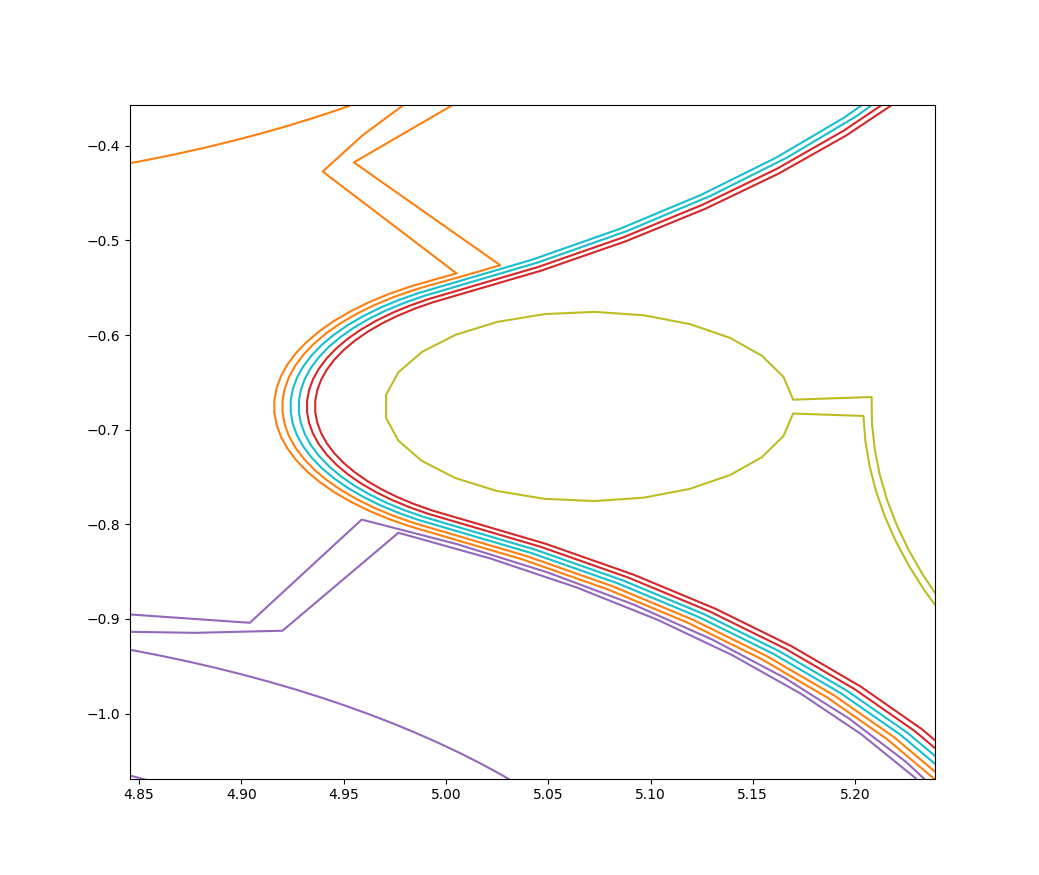

In [40]:
%matplotlib notebook
for polyindex in range(2820,2885):
    xs = polygons[polyindex][::2]
    ys = polygons[polyindex][1::2]
    plt.plot(xs,ys)
    plt.scatter(xs[0], ys[1], c='g', s=30)
    plt.scatter(xs[-2], ys[-1], c='r', s=30)

# Triangulate

In [41]:
from earcut import earcut
from copy import copy

In [42]:
triangle_list = []
deviation_list = []

In [43]:
num_triangles = 0
max_dev = -99999.
max_dev_ind = -1
for index, poly in enumerate(polygons):
    print(f"{index}/{len(polygons)}, generated {num_triangles} triangles, maximum deviation {max_dev:.3} at polygon {max_dev_ind}")
    triangles = earcut.earcut(poly)
    num_triangles += int(len(triangles)/3)
    deviation = earcut.deviation(poly, [], 2, triangles)
    if deviation > max_dev:
        max_dev = deviation
        max_dev_ind = index
        print(f"New maximum deviation: {max_dev:.3}")
    triangle_list.append(copy(triangles))
    deviation_list.append(deviation)
print(f"Generated {num_triangles} triangles.")

0/5135, generated 0 triangles, maximum deviation -1e+05 at polygon -1
New maximum deviation: 3.74e-13
1/5135, generated 305 triangles, maximum deviation 3.74e-13 at polygon 0
New maximum deviation: 4.12e-13
2/5135, generated 612 triangles, maximum deviation 4.12e-13 at polygon 1
3/5135, generated 917 triangles, maximum deviation 4.12e-13 at polygon 1
4/5135, generated 1242 triangles, maximum deviation 4.12e-13 at polygon 1
5/5135, generated 1499 triangles, maximum deviation 4.12e-13 at polygon 1
6/5135, generated 1904 triangles, maximum deviation 4.12e-13 at polygon 1
New maximum deviation: 5.34e-13
7/5135, generated 2311 triangles, maximum deviation 5.34e-13 at polygon 6
New maximum deviation: 1.47e-12
8/5135, generated 2716 triangles, maximum deviation 1.47e-12 at polygon 7
9/5135, generated 3143 triangles, maximum deviation 1.47e-12 at polygon 7
10/5135, generated 3492 triangles, maximum deviation 1.47e-12 at polygon 7
New maximum deviation: 2.21e-12
11/5135, generated 3997 triangle

105/5135, generated 64735 triangles, maximum deviation 2.21e-12 at polygon 10
106/5135, generated 65542 triangles, maximum deviation 2.21e-12 at polygon 10
107/5135, generated 66345 triangles, maximum deviation 2.21e-12 at polygon 10
108/5135, generated 67172 triangles, maximum deviation 2.21e-12 at polygon 10
109/5135, generated 67921 triangles, maximum deviation 2.21e-12 at polygon 10
110/5135, generated 68824 triangles, maximum deviation 2.21e-12 at polygon 10
111/5135, generated 69733 triangles, maximum deviation 2.21e-12 at polygon 10
112/5135, generated 70636 triangles, maximum deviation 2.21e-12 at polygon 10
113/5135, generated 71565 triangles, maximum deviation 2.21e-12 at polygon 10
114/5135, generated 72514 triangles, maximum deviation 2.21e-12 at polygon 10
115/5135, generated 73517 triangles, maximum deviation 2.21e-12 at polygon 10
116/5135, generated 74528 triangles, maximum deviation 2.21e-12 at polygon 10
117/5135, generated 75531 triangles, maximum deviation 2.21e-12 

210/5135, generated 138974 triangles, maximum deviation 2.21e-12 at polygon 10
211/5135, generated 139769 triangles, maximum deviation 2.21e-12 at polygon 10
212/5135, generated 140588 triangles, maximum deviation 2.21e-12 at polygon 10
213/5135, generated 141329 triangles, maximum deviation 2.21e-12 at polygon 10
214/5135, generated 141976 triangles, maximum deviation 2.21e-12 at polygon 10
215/5135, generated 142675 triangles, maximum deviation 2.21e-12 at polygon 10
216/5135, generated 143370 triangles, maximum deviation 2.21e-12 at polygon 10
217/5135, generated 144089 triangles, maximum deviation 2.21e-12 at polygon 10
218/5135, generated 144732 triangles, maximum deviation 2.21e-12 at polygon 10
219/5135, generated 145279 triangles, maximum deviation 2.21e-12 at polygon 10
220/5135, generated 145878 triangles, maximum deviation 2.21e-12 at polygon 10
221/5135, generated 146473 triangles, maximum deviation 2.21e-12 at polygon 10
222/5135, generated 147092 triangles, maximum deviat

321/5135, generated 205249 triangles, maximum deviation 2.21e-12 at polygon 10
322/5135, generated 205644 triangles, maximum deviation 2.21e-12 at polygon 10
323/5135, generated 206039 triangles, maximum deviation 2.21e-12 at polygon 10
324/5135, generated 206434 triangles, maximum deviation 2.21e-12 at polygon 10
325/5135, generated 206849 triangles, maximum deviation 2.21e-12 at polygon 10
326/5135, generated 207186 triangles, maximum deviation 2.21e-12 at polygon 10
327/5135, generated 207681 triangles, maximum deviation 2.21e-12 at polygon 10
328/5135, generated 208176 triangles, maximum deviation 2.21e-12 at polygon 10
329/5135, generated 208671 triangles, maximum deviation 2.21e-12 at polygon 10
330/5135, generated 209186 triangles, maximum deviation 2.21e-12 at polygon 10
331/5135, generated 209627 triangles, maximum deviation 2.21e-12 at polygon 10
332/5135, generated 210220 triangles, maximum deviation 2.21e-12 at polygon 10
333/5135, generated 210815 triangles, maximum deviat

425/5135, generated 270575 triangles, maximum deviation 2.21e-12 at polygon 10
426/5135, generated 271470 triangles, maximum deviation 2.21e-12 at polygon 10
427/5135, generated 272365 triangles, maximum deviation 2.21e-12 at polygon 10
428/5135, generated 273260 triangles, maximum deviation 2.21e-12 at polygon 10
429/5135, generated 274175 triangles, maximum deviation 2.21e-12 at polygon 10
430/5135, generated 275116 triangles, maximum deviation 2.21e-12 at polygon 10
431/5135, generated 276111 triangles, maximum deviation 2.21e-12 at polygon 10
432/5135, generated 277106 triangles, maximum deviation 2.21e-12 at polygon 10
433/5135, generated 278101 triangles, maximum deviation 2.21e-12 at polygon 10
434/5135, generated 279116 triangles, maximum deviation 2.21e-12 at polygon 10
435/5135, generated 280057 triangles, maximum deviation 2.21e-12 at polygon 10
436/5135, generated 281000 triangles, maximum deviation 2.21e-12 at polygon 10
437/5135, generated 281991 triangles, maximum deviat

529/5135, generated 343043 triangles, maximum deviation 2.21e-12 at polygon 10
530/5135, generated 343686 triangles, maximum deviation 2.21e-12 at polygon 10
531/5135, generated 344377 triangles, maximum deviation 2.21e-12 at polygon 10
532/5135, generated 345068 triangles, maximum deviation 2.21e-12 at polygon 10
533/5135, generated 345779 triangles, maximum deviation 2.21e-12 at polygon 10
534/5135, generated 346418 triangles, maximum deviation 2.21e-12 at polygon 10
535/5135, generated 346961 triangles, maximum deviation 2.21e-12 at polygon 10
536/5135, generated 347552 triangles, maximum deviation 2.21e-12 at polygon 10
537/5135, generated 348143 triangles, maximum deviation 2.21e-12 at polygon 10
538/5135, generated 348754 triangles, maximum deviation 2.21e-12 at polygon 10
539/5135, generated 349291 triangles, maximum deviation 2.21e-12 at polygon 10
540/5135, generated 349734 triangles, maximum deviation 2.21e-12 at polygon 10
541/5135, generated 350225 triangles, maximum deviat

638/5135, generated 406858 triangles, maximum deviation 2.21e-12 at polygon 10
639/5135, generated 407249 triangles, maximum deviation 2.21e-12 at polygon 10
640/5135, generated 407640 triangles, maximum deviation 2.21e-12 at polygon 10
641/5135, generated 408051 triangles, maximum deviation 2.21e-12 at polygon 10
642/5135, generated 408388 triangles, maximum deviation 2.21e-12 at polygon 10
643/5135, generated 408879 triangles, maximum deviation 2.21e-12 at polygon 10
644/5135, generated 409370 triangles, maximum deviation 2.21e-12 at polygon 10
645/5135, generated 409861 triangles, maximum deviation 2.21e-12 at polygon 10
646/5135, generated 410372 triangles, maximum deviation 2.21e-12 at polygon 10
647/5135, generated 410809 triangles, maximum deviation 2.21e-12 at polygon 10
648/5135, generated 411400 triangles, maximum deviation 2.21e-12 at polygon 10
649/5135, generated 411991 triangles, maximum deviation 2.21e-12 at polygon 10
650/5135, generated 412582 triangles, maximum deviat

742/5135, generated 472508 triangles, maximum deviation 2.21e-12 at polygon 10
743/5135, generated 473401 triangles, maximum deviation 2.21e-12 at polygon 10
744/5135, generated 474296 triangles, maximum deviation 2.21e-12 at polygon 10
745/5135, generated 475209 triangles, maximum deviation 2.21e-12 at polygon 10
746/5135, generated 476146 triangles, maximum deviation 2.21e-12 at polygon 10
747/5135, generated 477141 triangles, maximum deviation 2.21e-12 at polygon 10
748/5135, generated 478132 triangles, maximum deviation 2.21e-12 at polygon 10
749/5135, generated 479127 triangles, maximum deviation 2.21e-12 at polygon 10
750/5135, generated 480140 triangles, maximum deviation 2.21e-12 at polygon 10
751/5135, generated 481081 triangles, maximum deviation 2.21e-12 at polygon 10
752/5135, generated 482030 triangles, maximum deviation 2.21e-12 at polygon 10
753/5135, generated 483023 triangles, maximum deviation 2.21e-12 at polygon 10
754/5135, generated 484020 triangles, maximum deviat

846/5135, generated 544866 triangles, maximum deviation 2.21e-12 at polygon 10
847/5135, generated 545557 triangles, maximum deviation 2.21e-12 at polygon 10
848/5135, generated 546250 triangles, maximum deviation 2.21e-12 at polygon 10
849/5135, generated 546961 triangles, maximum deviation 2.21e-12 at polygon 10
850/5135, generated 547602 triangles, maximum deviation 2.21e-12 at polygon 10
851/5135, generated 548147 triangles, maximum deviation 2.21e-12 at polygon 10
852/5135, generated 548738 triangles, maximum deviation 2.21e-12 at polygon 10
853/5135, generated 549331 triangles, maximum deviation 2.21e-12 at polygon 10
854/5135, generated 549942 triangles, maximum deviation 2.21e-12 at polygon 10
855/5135, generated 550483 triangles, maximum deviation 2.21e-12 at polygon 10
856/5135, generated 550928 triangles, maximum deviation 2.21e-12 at polygon 10
857/5135, generated 551419 triangles, maximum deviation 2.21e-12 at polygon 10
858/5135, generated 551912 triangles, maximum deviat

954/5135, generated 608240 triangles, maximum deviation 2.21e-12 at polygon 10
955/5135, generated 608631 triangles, maximum deviation 2.21e-12 at polygon 10
956/5135, generated 609022 triangles, maximum deviation 2.21e-12 at polygon 10
957/5135, generated 609433 triangles, maximum deviation 2.21e-12 at polygon 10
958/5135, generated 609772 triangles, maximum deviation 2.21e-12 at polygon 10
959/5135, generated 610263 triangles, maximum deviation 2.21e-12 at polygon 10
960/5135, generated 610754 triangles, maximum deviation 2.21e-12 at polygon 10
961/5135, generated 611245 triangles, maximum deviation 2.21e-12 at polygon 10
962/5135, generated 611756 triangles, maximum deviation 2.21e-12 at polygon 10
963/5135, generated 612195 triangles, maximum deviation 2.21e-12 at polygon 10
964/5135, generated 612786 triangles, maximum deviation 2.21e-12 at polygon 10
965/5135, generated 613377 triangles, maximum deviation 2.21e-12 at polygon 10
966/5135, generated 613968 triangles, maximum deviat

1057/5135, generated 673049 triangles, maximum deviation 2.21e-12 at polygon 10
1058/5135, generated 673944 triangles, maximum deviation 2.21e-12 at polygon 10
1059/5135, generated 674837 triangles, maximum deviation 2.21e-12 at polygon 10
1060/5135, generated 675732 triangles, maximum deviation 2.21e-12 at polygon 10
1061/5135, generated 676645 triangles, maximum deviation 2.21e-12 at polygon 10
1062/5135, generated 677582 triangles, maximum deviation 2.21e-12 at polygon 10
1063/5135, generated 678577 triangles, maximum deviation 2.21e-12 at polygon 10
1064/5135, generated 679570 triangles, maximum deviation 2.21e-12 at polygon 10
1065/5135, generated 680565 triangles, maximum deviation 2.21e-12 at polygon 10
1066/5135, generated 681578 triangles, maximum deviation 2.21e-12 at polygon 10
1067/5135, generated 682521 triangles, maximum deviation 2.21e-12 at polygon 10
1068/5135, generated 683470 triangles, maximum deviation 2.21e-12 at polygon 10
1069/5135, generated 684465 triangles, m

1160/5135, generated 744950 triangles, maximum deviation 2.21e-12 at polygon 10
1161/5135, generated 745689 triangles, maximum deviation 2.21e-12 at polygon 10
1162/5135, generated 746334 triangles, maximum deviation 2.21e-12 at polygon 10
1163/5135, generated 747025 triangles, maximum deviation 2.21e-12 at polygon 10
1164/5135, generated 747718 triangles, maximum deviation 2.21e-12 at polygon 10
1165/5135, generated 748429 triangles, maximum deviation 2.21e-12 at polygon 10
1166/5135, generated 749070 triangles, maximum deviation 2.21e-12 at polygon 10
1167/5135, generated 749615 triangles, maximum deviation 2.21e-12 at polygon 10
1168/5135, generated 750206 triangles, maximum deviation 2.21e-12 at polygon 10
1169/5135, generated 750799 triangles, maximum deviation 2.21e-12 at polygon 10
1170/5135, generated 751410 triangles, maximum deviation 2.21e-12 at polygon 10
1171/5135, generated 751949 triangles, maximum deviation 2.21e-12 at polygon 10
1172/5135, generated 752394 triangles, m

1264/5135, generated 807894 triangles, maximum deviation 2.21e-12 at polygon 10
1265/5135, generated 808185 triangles, maximum deviation 2.21e-12 at polygon 10
1266/5135, generated 808476 triangles, maximum deviation 2.21e-12 at polygon 10
1267/5135, generated 808767 triangles, maximum deviation 2.21e-12 at polygon 10
1268/5135, generated 809078 triangles, maximum deviation 2.21e-12 at polygon 10
1269/5135, generated 809317 triangles, maximum deviation 2.21e-12 at polygon 10
1270/5135, generated 809708 triangles, maximum deviation 2.21e-12 at polygon 10
1271/5135, generated 810099 triangles, maximum deviation 2.21e-12 at polygon 10
1272/5135, generated 810490 triangles, maximum deviation 2.21e-12 at polygon 10
1273/5135, generated 810901 triangles, maximum deviation 2.21e-12 at polygon 10
1274/5135, generated 811240 triangles, maximum deviation 2.21e-12 at polygon 10
1275/5135, generated 811731 triangles, maximum deviation 2.21e-12 at polygon 10
1276/5135, generated 812222 triangles, m

1367/5135, generated 869805 triangles, maximum deviation 2.21e-12 at polygon 10
1368/5135, generated 870544 triangles, maximum deviation 2.21e-12 at polygon 10
1369/5135, generated 871339 triangles, maximum deviation 2.21e-12 at polygon 10
1370/5135, generated 872132 triangles, maximum deviation 2.21e-12 at polygon 10
1371/5135, generated 872927 triangles, maximum deviation 2.21e-12 at polygon 10
1372/5135, generated 873740 triangles, maximum deviation 2.21e-12 at polygon 10
1373/5135, generated 874481 triangles, maximum deviation 2.21e-12 at polygon 10
1374/5135, generated 875376 triangles, maximum deviation 2.21e-12 at polygon 10
1375/5135, generated 876269 triangles, maximum deviation 2.21e-12 at polygon 10
1376/5135, generated 877164 triangles, maximum deviation 2.21e-12 at polygon 10
1377/5135, generated 878077 triangles, maximum deviation 2.21e-12 at polygon 10
1378/5135, generated 879016 triangles, maximum deviation 2.21e-12 at polygon 10
1379/5135, generated 880011 triangles, m

1470/5135, generated 941500 triangles, maximum deviation 2.21e-12 at polygon 10
1471/5135, generated 942415 triangles, maximum deviation 2.21e-12 at polygon 10
1472/5135, generated 943254 triangles, maximum deviation 2.21e-12 at polygon 10
1473/5135, generated 943999 triangles, maximum deviation 2.21e-12 at polygon 10
1474/5135, generated 944794 triangles, maximum deviation 2.21e-12 at polygon 10
1475/5135, generated 945587 triangles, maximum deviation 2.21e-12 at polygon 10
1476/5135, generated 946402 triangles, maximum deviation 2.21e-12 at polygon 10
1477/5135, generated 947141 triangles, maximum deviation 2.21e-12 at polygon 10
1478/5135, generated 947786 triangles, maximum deviation 2.21e-12 at polygon 10
1479/5135, generated 948481 triangles, maximum deviation 2.21e-12 at polygon 10
1480/5135, generated 949174 triangles, maximum deviation 2.21e-12 at polygon 10
1481/5135, generated 949889 triangles, maximum deviation 2.21e-12 at polygon 10
1482/5135, generated 950528 triangles, m

1575/5135, generated 1007821 triangles, maximum deviation 2.21e-12 at polygon 10
1576/5135, generated 1008164 triangles, maximum deviation 2.21e-12 at polygon 10
1577/5135, generated 1008411 triangles, maximum deviation 2.21e-12 at polygon 10
1578/5135, generated 1008706 triangles, maximum deviation 2.21e-12 at polygon 10
1579/5135, generated 1009001 triangles, maximum deviation 2.21e-12 at polygon 10
1580/5135, generated 1009316 triangles, maximum deviation 2.21e-12 at polygon 10
1581/5135, generated 1009609 triangles, maximum deviation 2.21e-12 at polygon 10
1582/5135, generated 1009902 triangles, maximum deviation 2.21e-12 at polygon 10
1583/5135, generated 1010195 triangles, maximum deviation 2.21e-12 at polygon 10
1584/5135, generated 1010508 triangles, maximum deviation 2.21e-12 at polygon 10
1585/5135, generated 1010745 triangles, maximum deviation 2.21e-12 at polygon 10
1586/5135, generated 1011136 triangles, maximum deviation 2.21e-12 at polygon 10
1587/5135, generated 1011529

1677/5135, generated 1067317 triangles, maximum deviation 2.21e-12 at polygon 10
1678/5135, generated 1067928 triangles, maximum deviation 2.21e-12 at polygon 10
1679/5135, generated 1068467 triangles, maximum deviation 2.21e-12 at polygon 10
1680/5135, generated 1069160 triangles, maximum deviation 2.21e-12 at polygon 10
1681/5135, generated 1069851 triangles, maximum deviation 2.21e-12 at polygon 10
1682/5135, generated 1070544 triangles, maximum deviation 2.21e-12 at polygon 10
1683/5135, generated 1071255 triangles, maximum deviation 2.21e-12 at polygon 10
1684/5135, generated 1071996 triangles, maximum deviation 2.21e-12 at polygon 10
1685/5135, generated 1072789 triangles, maximum deviation 2.21e-12 at polygon 10
1686/5135, generated 1073580 triangles, maximum deviation 2.21e-12 at polygon 10
1687/5135, generated 1074373 triangles, maximum deviation 2.21e-12 at polygon 10
1688/5135, generated 1075184 triangles, maximum deviation 2.21e-12 at polygon 10
1689/5135, generated 1075923

1779/5135, generated 1136333 triangles, maximum deviation 2.21e-12 at polygon 10
1780/5135, generated 1137326 triangles, maximum deviation 2.21e-12 at polygon 10
1781/5135, generated 1138317 triangles, maximum deviation 2.21e-12 at polygon 10
1782/5135, generated 1139330 triangles, maximum deviation 2.21e-12 at polygon 10
1783/5135, generated 1140267 triangles, maximum deviation 2.21e-12 at polygon 10
1784/5135, generated 1141110 triangles, maximum deviation 2.21e-12 at polygon 10
1785/5135, generated 1142001 triangles, maximum deviation 2.21e-12 at polygon 10
1786/5135, generated 1142892 triangles, maximum deviation 2.21e-12 at polygon 10
1787/5135, generated 1143803 triangles, maximum deviation 2.21e-12 at polygon 10
1788/5135, generated 1144642 triangles, maximum deviation 2.21e-12 at polygon 10
1789/5135, generated 1145385 triangles, maximum deviation 2.21e-12 at polygon 10
1790/5135, generated 1146176 triangles, maximum deviation 2.21e-12 at polygon 10
1791/5135, generated 1146967

1881/5135, generated 1204651 triangles, maximum deviation 2.21e-12 at polygon 10
1882/5135, generated 1205192 triangles, maximum deviation 2.21e-12 at polygon 10
1883/5135, generated 1205637 triangles, maximum deviation 2.21e-12 at polygon 10
1884/5135, generated 1206130 triangles, maximum deviation 2.21e-12 at polygon 10
1885/5135, generated 1206623 triangles, maximum deviation 2.21e-12 at polygon 10
1886/5135, generated 1207136 triangles, maximum deviation 2.21e-12 at polygon 10
1887/5135, generated 1207475 triangles, maximum deviation 2.21e-12 at polygon 10
1888/5135, generated 1207820 triangles, maximum deviation 2.21e-12 at polygon 10
1889/5135, generated 1208213 triangles, maximum deviation 2.21e-12 at polygon 10
1890/5135, generated 1208606 triangles, maximum deviation 2.21e-12 at polygon 10
1891/5135, generated 1209019 triangles, maximum deviation 2.21e-12 at polygon 10
1892/5135, generated 1209360 triangles, maximum deviation 2.21e-12 at polygon 10
1893/5135, generated 1209605

1986/5135, generated 1264688 triangles, maximum deviation 2.21e-12 at polygon 10
1987/5135, generated 1265179 triangles, maximum deviation 2.21e-12 at polygon 10
1988/5135, generated 1265670 triangles, maximum deviation 2.21e-12 at polygon 10
1989/5135, generated 1266181 triangles, maximum deviation 2.21e-12 at polygon 10
1990/5135, generated 1266724 triangles, maximum deviation 2.21e-12 at polygon 10
1991/5135, generated 1267315 triangles, maximum deviation 2.21e-12 at polygon 10
1992/5135, generated 1267906 triangles, maximum deviation 2.21e-12 at polygon 10
1993/5135, generated 1268497 triangles, maximum deviation 2.21e-12 at polygon 10
1994/5135, generated 1269108 triangles, maximum deviation 2.21e-12 at polygon 10
1995/5135, generated 1269647 triangles, maximum deviation 2.21e-12 at polygon 10
1996/5135, generated 1270338 triangles, maximum deviation 2.21e-12 at polygon 10
1997/5135, generated 1271029 triangles, maximum deviation 2.21e-12 at polygon 10
1998/5135, generated 1271720

2088/5135, generated 1330774 triangles, maximum deviation 2.21e-12 at polygon 10
2089/5135, generated 1331613 triangles, maximum deviation 2.21e-12 at polygon 10
2090/5135, generated 1332606 triangles, maximum deviation 2.21e-12 at polygon 10
2091/5135, generated 1333603 triangles, maximum deviation 2.21e-12 at polygon 10
2092/5135, generated 1334596 triangles, maximum deviation 2.21e-12 at polygon 10
2093/5135, generated 1335613 triangles, maximum deviation 2.21e-12 at polygon 10
2094/5135, generated 1336552 triangles, maximum deviation 2.21e-12 at polygon 10
2095/5135, generated 1337495 triangles, maximum deviation 2.21e-12 at polygon 10
2096/5135, generated 1338488 triangles, maximum deviation 2.21e-12 at polygon 10
2097/5135, generated 1339479 triangles, maximum deviation 2.21e-12 at polygon 10
2098/5135, generated 1340492 triangles, maximum deviation 2.21e-12 at polygon 10
2099/5135, generated 1341429 triangles, maximum deviation 2.21e-12 at polygon 10
2100/5135, generated 1342272

2190/5135, generated 1401536 triangles, maximum deviation 2.21e-12 at polygon 10
2191/5135, generated 1402229 triangles, maximum deviation 2.21e-12 at polygon 10
2192/5135, generated 1402940 triangles, maximum deviation 2.21e-12 at polygon 10
2193/5135, generated 1403481 triangles, maximum deviation 2.21e-12 at polygon 10
2194/5135, generated 1404026 triangles, maximum deviation 2.21e-12 at polygon 10
2195/5135, generated 1404617 triangles, maximum deviation 2.21e-12 at polygon 10
2196/5135, generated 1405210 triangles, maximum deviation 2.21e-12 at polygon 10
2197/5135, generated 1405821 triangles, maximum deviation 2.21e-12 at polygon 10
2198/5135, generated 1406360 triangles, maximum deviation 2.21e-12 at polygon 10
2199/5135, generated 1406803 triangles, maximum deviation 2.21e-12 at polygon 10
2200/5135, generated 1407294 triangles, maximum deviation 2.21e-12 at polygon 10
2201/5135, generated 1407787 triangles, maximum deviation 2.21e-12 at polygon 10
2202/5135, generated 1408298

2293/5135, generated 1462621 triangles, maximum deviation 2.21e-12 at polygon 10
2294/5135, generated 1462914 triangles, maximum deviation 2.21e-12 at polygon 10
2295/5135, generated 1463227 triangles, maximum deviation 2.21e-12 at polygon 10
2296/5135, generated 1463572 triangles, maximum deviation 2.21e-12 at polygon 10
2297/5135, generated 1463965 triangles, maximum deviation 2.21e-12 at polygon 10
2298/5135, generated 1464358 triangles, maximum deviation 2.21e-12 at polygon 10
2299/5135, generated 1464751 triangles, maximum deviation 2.21e-12 at polygon 10
2300/5135, generated 1465164 triangles, maximum deviation 2.21e-12 at polygon 10
2301/5135, generated 1465501 triangles, maximum deviation 2.21e-12 at polygon 10
2302/5135, generated 1465992 triangles, maximum deviation 2.21e-12 at polygon 10
2303/5135, generated 1466485 triangles, maximum deviation 2.21e-12 at polygon 10
2304/5135, generated 1466978 triangles, maximum deviation 2.21e-12 at polygon 10
2305/5135, generated 1467491

2395/5135, generated 1524589 triangles, maximum deviation 2.21e-12 at polygon 10
2396/5135, generated 1525386 triangles, maximum deviation 2.21e-12 at polygon 10
2397/5135, generated 1526183 triangles, maximum deviation 2.21e-12 at polygon 10
2398/5135, generated 1526980 triangles, maximum deviation 2.21e-12 at polygon 10
2399/5135, generated 1527797 triangles, maximum deviation 2.21e-12 at polygon 10
2400/5135, generated 1528538 triangles, maximum deviation 2.21e-12 at polygon 10
2401/5135, generated 1529433 triangles, maximum deviation 2.21e-12 at polygon 10
2402/5135, generated 1530330 triangles, maximum deviation 2.21e-12 at polygon 10
2403/5135, generated 1531225 triangles, maximum deviation 2.21e-12 at polygon 10
2404/5135, generated 1532142 triangles, maximum deviation 2.21e-12 at polygon 10
2405/5135, generated 1532983 triangles, maximum deviation 2.21e-12 at polygon 10
2406/5135, generated 1533978 triangles, maximum deviation 2.21e-12 at polygon 10
2407/5135, generated 1534975

2497/5135, generated 1596191 triangles, maximum deviation 2.21e-12 at polygon 10
2498/5135, generated 1597104 triangles, maximum deviation 2.21e-12 at polygon 10
2499/5135, generated 1597847 triangles, maximum deviation 2.21e-12 at polygon 10
2500/5135, generated 1598590 triangles, maximum deviation 2.21e-12 at polygon 10
2501/5135, generated 1599383 triangles, maximum deviation 2.21e-12 at polygon 10
2502/5135, generated 1600174 triangles, maximum deviation 2.21e-12 at polygon 10
2503/5135, generated 1600987 triangles, maximum deviation 2.21e-12 at polygon 10
2504/5135, generated 1601724 triangles, maximum deviation 2.21e-12 at polygon 10
2505/5135, generated 1602367 triangles, maximum deviation 2.21e-12 at polygon 10
2506/5135, generated 1603060 triangles, maximum deviation 2.21e-12 at polygon 10
2507/5135, generated 1603751 triangles, maximum deviation 2.21e-12 at polygon 10
2508/5135, generated 1604464 triangles, maximum deviation 2.21e-12 at polygon 10
2509/5135, generated 1605007

2600/5135, generated 1661424 triangles, maximum deviation 2.21e-12 at polygon 10
2601/5135, generated 1661819 triangles, maximum deviation 2.21e-12 at polygon 10
2602/5135, generated 1662236 triangles, maximum deviation 2.21e-12 at polygon 10
2603/5135, generated 1662575 triangles, maximum deviation 2.21e-12 at polygon 10
2604/5135, generated 1662824 triangles, maximum deviation 2.21e-12 at polygon 10
2605/5135, generated 1663121 triangles, maximum deviation 2.21e-12 at polygon 10
2606/5135, generated 1663416 triangles, maximum deviation 2.21e-12 at polygon 10
2607/5135, generated 1663733 triangles, maximum deviation 2.21e-12 at polygon 10
2608/5135, generated 1664028 triangles, maximum deviation 2.21e-12 at polygon 10
2609/5135, generated 1664323 triangles, maximum deviation 2.21e-12 at polygon 10
2610/5135, generated 1664618 triangles, maximum deviation 2.21e-12 at polygon 10
2611/5135, generated 1664933 triangles, maximum deviation 2.21e-12 at polygon 10
2612/5135, generated 1665280

2702/5135, generated 1720648 triangles, maximum deviation 2.21e-12 at polygon 10
2703/5135, generated 1721249 triangles, maximum deviation 2.21e-12 at polygon 10
2704/5135, generated 1721848 triangles, maximum deviation 2.21e-12 at polygon 10
2705/5135, generated 1722467 triangles, maximum deviation 2.21e-12 at polygon 10
2706/5135, generated 1723010 triangles, maximum deviation 2.21e-12 at polygon 10
2707/5135, generated 1723709 triangles, maximum deviation 2.21e-12 at polygon 10
2708/5135, generated 1724410 triangles, maximum deviation 2.21e-12 at polygon 10
2709/5135, generated 1725109 triangles, maximum deviation 2.21e-12 at polygon 10
2710/5135, generated 1725830 triangles, maximum deviation 2.21e-12 at polygon 10
2711/5135, generated 1726473 triangles, maximum deviation 2.21e-12 at polygon 10
2712/5135, generated 1727270 triangles, maximum deviation 2.21e-12 at polygon 10
2713/5135, generated 1728071 triangles, maximum deviation 2.21e-12 at polygon 10
2714/5135, generated 1728868

2804/5135, generated 1789850 triangles, maximum deviation 2.21e-12 at polygon 10
2805/5135, generated 1790791 triangles, maximum deviation 2.21e-12 at polygon 10
2806/5135, generated 1791736 triangles, maximum deviation 2.21e-12 at polygon 10
2807/5135, generated 1792731 triangles, maximum deviation 2.21e-12 at polygon 10
2808/5135, generated 1793724 triangles, maximum deviation 2.21e-12 at polygon 10
2809/5135, generated 1794739 triangles, maximum deviation 2.21e-12 at polygon 10
2810/5135, generated 1795678 triangles, maximum deviation 2.21e-12 at polygon 10
2811/5135, generated 1796523 triangles, maximum deviation 2.21e-12 at polygon 10
2812/5135, generated 1797418 triangles, maximum deviation 2.21e-12 at polygon 10
2813/5135, generated 1798311 triangles, maximum deviation 2.21e-12 at polygon 10
2814/5135, generated 1799226 triangles, maximum deviation 2.21e-12 at polygon 10
2815/5135, generated 1799971 triangles, maximum deviation 2.21e-12 at polygon 10
2816/5135, generated 1800716

2906/5135, generated 1858856 triangles, maximum deviation 2.21e-12 at polygon 10
2907/5135, generated 1859453 triangles, maximum deviation 2.21e-12 at polygon 10
2908/5135, generated 1860072 triangles, maximum deviation 2.21e-12 at polygon 10
2909/5135, generated 1860615 triangles, maximum deviation 2.21e-12 at polygon 10
2910/5135, generated 1861064 triangles, maximum deviation 2.21e-12 at polygon 10
2911/5135, generated 1861563 triangles, maximum deviation 2.21e-12 at polygon 10
2912/5135, generated 1862060 triangles, maximum deviation 2.21e-12 at polygon 10
2913/5135, generated 1862579 triangles, maximum deviation 2.21e-12 at polygon 10
2914/5135, generated 1863022 triangles, maximum deviation 2.21e-12 at polygon 10
2915/5135, generated 1863371 triangles, maximum deviation 2.21e-12 at polygon 10
2916/5135, generated 1863768 triangles, maximum deviation 2.21e-12 at polygon 10
2917/5135, generated 1864165 triangles, maximum deviation 2.21e-12 at polygon 10
2918/5135, generated 1864584

3009/5135, generated 1918967 triangles, maximum deviation 2.21e-12 at polygon 10
3010/5135, generated 1919368 triangles, maximum deviation 2.21e-12 at polygon 10
3011/5135, generated 1919789 triangles, maximum deviation 2.21e-12 at polygon 10
3012/5135, generated 1920134 triangles, maximum deviation 2.21e-12 at polygon 10
3013/5135, generated 1920635 triangles, maximum deviation 2.21e-12 at polygon 10
3014/5135, generated 1921136 triangles, maximum deviation 2.21e-12 at polygon 10
3015/5135, generated 1921637 triangles, maximum deviation 2.21e-12 at polygon 10
3016/5135, generated 1922158 triangles, maximum deviation 2.21e-12 at polygon 10
3017/5135, generated 1922603 triangles, maximum deviation 2.21e-12 at polygon 10
3018/5135, generated 1923204 triangles, maximum deviation 2.21e-12 at polygon 10
3019/5135, generated 1923805 triangles, maximum deviation 2.21e-12 at polygon 10
3020/5135, generated 1924406 triangles, maximum deviation 2.21e-12 at polygon 10
3021/5135, generated 1925027

3111/5135, generated 1984059 triangles, maximum deviation 2.21e-12 at polygon 10
3112/5135, generated 1984956 triangles, maximum deviation 2.21e-12 at polygon 10
3113/5135, generated 1985855 triangles, maximum deviation 2.21e-12 at polygon 10
3114/5135, generated 1986752 triangles, maximum deviation 2.21e-12 at polygon 10
3115/5135, generated 1987671 triangles, maximum deviation 2.21e-12 at polygon 10
3116/5135, generated 1988622 triangles, maximum deviation 2.21e-12 at polygon 10
3117/5135, generated 1989619 triangles, maximum deviation 2.21e-12 at polygon 10
3118/5135, generated 1990618 triangles, maximum deviation 2.21e-12 at polygon 10
3119/5135, generated 1991615 triangles, maximum deviation 2.21e-12 at polygon 10
3120/5135, generated 1992634 triangles, maximum deviation 2.21e-12 at polygon 10
3121/5135, generated 1993577 triangles, maximum deviation 2.21e-12 at polygon 10
3122/5135, generated 1994524 triangles, maximum deviation 2.21e-12 at polygon 10
3123/5135, generated 1995521

3213/5135, generated 2055701 triangles, maximum deviation 2.21e-12 at polygon 10
3214/5135, generated 2056522 triangles, maximum deviation 2.21e-12 at polygon 10
3215/5135, generated 2057267 triangles, maximum deviation 2.21e-12 at polygon 10
3216/5135, generated 2057918 triangles, maximum deviation 2.21e-12 at polygon 10
3217/5135, generated 2058619 triangles, maximum deviation 2.21e-12 at polygon 10
3218/5135, generated 2059318 triangles, maximum deviation 2.21e-12 at polygon 10
3219/5135, generated 2060039 triangles, maximum deviation 2.21e-12 at polygon 10
3220/5135, generated 2060682 triangles, maximum deviation 2.21e-12 at polygon 10
3221/5135, generated 2061233 triangles, maximum deviation 2.21e-12 at polygon 10
3222/5135, generated 2061834 triangles, maximum deviation 2.21e-12 at polygon 10
3223/5135, generated 2062433 triangles, maximum deviation 2.21e-12 at polygon 10
3224/5135, generated 2063054 triangles, maximum deviation 2.21e-12 at polygon 10
3225/5135, generated 2063599

3324/5135, generated 2121848 triangles, maximum deviation 2.21e-12 at polygon 10
3325/5135, generated 2122251 triangles, maximum deviation 2.21e-12 at polygon 10
3326/5135, generated 2122654 triangles, maximum deviation 2.21e-12 at polygon 10
3327/5135, generated 2123077 triangles, maximum deviation 2.21e-12 at polygon 10
3328/5135, generated 2123424 triangles, maximum deviation 2.21e-12 at polygon 10
3329/5135, generated 2123927 triangles, maximum deviation 2.21e-12 at polygon 10
3330/5135, generated 2124430 triangles, maximum deviation 2.21e-12 at polygon 10
3331/5135, generated 2124933 triangles, maximum deviation 2.21e-12 at polygon 10
3332/5135, generated 2125456 triangles, maximum deviation 2.21e-12 at polygon 10
3333/5135, generated 2125903 triangles, maximum deviation 2.21e-12 at polygon 10
3334/5135, generated 2126506 triangles, maximum deviation 2.21e-12 at polygon 10
3335/5135, generated 2127111 triangles, maximum deviation 2.21e-12 at polygon 10
3336/5135, generated 2127714

3426/5135, generated 2186852 triangles, maximum deviation 2.21e-12 at polygon 10
3427/5135, generated 2187599 triangles, maximum deviation 2.21e-12 at polygon 10
3428/5135, generated 2188502 triangles, maximum deviation 2.21e-12 at polygon 10
3429/5135, generated 2189403 triangles, maximum deviation 2.21e-12 at polygon 10
3430/5135, generated 2190306 triangles, maximum deviation 2.21e-12 at polygon 10
3431/5135, generated 2191227 triangles, maximum deviation 2.21e-12 at polygon 10
3432/5135, generated 2192178 triangles, maximum deviation 2.21e-12 at polygon 10
3433/5135, generated 2193181 triangles, maximum deviation 2.21e-12 at polygon 10
3434/5135, generated 2194182 triangles, maximum deviation 2.21e-12 at polygon 10
3435/5135, generated 2195185 triangles, maximum deviation 2.21e-12 at polygon 10
3436/5135, generated 2196206 triangles, maximum deviation 2.21e-12 at polygon 10
3437/5135, generated 2197153 triangles, maximum deviation 2.21e-12 at polygon 10
3438/5135, generated 2198102

3528/5135, generated 2258668 triangles, maximum deviation 2.21e-12 at polygon 10
3529/5135, generated 2259469 triangles, maximum deviation 2.21e-12 at polygon 10
3530/5135, generated 2260292 triangles, maximum deviation 2.21e-12 at polygon 10
3531/5135, generated 2261039 triangles, maximum deviation 2.21e-12 at polygon 10
3532/5135, generated 2261692 triangles, maximum deviation 2.21e-12 at polygon 10
3533/5135, generated 2262395 triangles, maximum deviation 2.21e-12 at polygon 10
3534/5135, generated 2263096 triangles, maximum deviation 2.21e-12 at polygon 10
3535/5135, generated 2263819 triangles, maximum deviation 2.21e-12 at polygon 10
3536/5135, generated 2264466 triangles, maximum deviation 2.21e-12 at polygon 10
3537/5135, generated 2265019 triangles, maximum deviation 2.21e-12 at polygon 10
3538/5135, generated 2265622 triangles, maximum deviation 2.21e-12 at polygon 10
3539/5135, generated 2266223 triangles, maximum deviation 2.21e-12 at polygon 10
3540/5135, generated 2266846

3634/5135, generated 2323936 triangles, maximum deviation 2.21e-12 at polygon 10
3635/5135, generated 2324241 triangles, maximum deviation 2.21e-12 at polygon 10
3636/5135, generated 2324546 triangles, maximum deviation 2.21e-12 at polygon 10
3637/5135, generated 2324851 triangles, maximum deviation 2.21e-12 at polygon 10
3638/5135, generated 2325176 triangles, maximum deviation 2.21e-12 at polygon 10
3639/5135, generated 2325425 triangles, maximum deviation 2.21e-12 at polygon 10
3640/5135, generated 2325830 triangles, maximum deviation 2.21e-12 at polygon 10
3641/5135, generated 2326235 triangles, maximum deviation 2.21e-12 at polygon 10
3642/5135, generated 2326640 triangles, maximum deviation 2.21e-12 at polygon 10
3643/5135, generated 2327065 triangles, maximum deviation 2.21e-12 at polygon 10
3644/5135, generated 2327414 triangles, maximum deviation 2.21e-12 at polygon 10
3645/5135, generated 2327919 triangles, maximum deviation 2.21e-12 at polygon 10
3646/5135, generated 2328424

3736/5135, generated 2386306 triangles, maximum deviation 2.21e-12 at polygon 10
3737/5135, generated 2387027 triangles, maximum deviation 2.21e-12 at polygon 10
3738/5135, generated 2387780 triangles, maximum deviation 2.21e-12 at polygon 10
3739/5135, generated 2388585 triangles, maximum deviation 2.21e-12 at polygon 10
3740/5135, generated 2389388 triangles, maximum deviation 2.21e-12 at polygon 10
3741/5135, generated 2390193 triangles, maximum deviation 2.21e-12 at polygon 10
3742/5135, generated 2391016 triangles, maximum deviation 2.21e-12 at polygon 10
3743/5135, generated 2391767 triangles, maximum deviation 2.21e-12 at polygon 10
3744/5135, generated 2392672 triangles, maximum deviation 2.21e-12 at polygon 10
3745/5135, generated 2393575 triangles, maximum deviation 2.21e-12 at polygon 10
3746/5135, generated 2394480 triangles, maximum deviation 2.21e-12 at polygon 10
3747/5135, generated 2395403 triangles, maximum deviation 2.21e-12 at polygon 10
3748/5135, generated 2396356

3838/5135, generated 2457876 triangles, maximum deviation 2.21e-12 at polygon 10
3839/5135, generated 2458781 triangles, maximum deviation 2.21e-12 at polygon 10
3840/5135, generated 2459684 triangles, maximum deviation 2.21e-12 at polygon 10
3841/5135, generated 2460609 triangles, maximum deviation 2.21e-12 at polygon 10
3842/5135, generated 2461456 triangles, maximum deviation 2.21e-12 at polygon 10
3843/5135, generated 2462211 triangles, maximum deviation 2.21e-12 at polygon 10
3844/5135, generated 2463016 triangles, maximum deviation 2.21e-12 at polygon 10
3845/5135, generated 2463819 triangles, maximum deviation 2.21e-12 at polygon 10
3846/5135, generated 2464644 triangles, maximum deviation 2.21e-12 at polygon 10
3847/5135, generated 2465391 triangles, maximum deviation 2.21e-12 at polygon 10
3848/5135, generated 2466046 triangles, maximum deviation 2.21e-12 at polygon 10
3849/5135, generated 2466751 triangles, maximum deviation 2.21e-12 at polygon 10
3850/5135, generated 2467454

3944/5135, generated 2526498 triangles, maximum deviation 2.21e-12 at polygon 10
3945/5135, generated 2526919 triangles, maximum deviation 2.21e-12 at polygon 10
3946/5135, generated 2527262 triangles, maximum deviation 2.21e-12 at polygon 10
3947/5135, generated 2527513 triangles, maximum deviation 2.21e-12 at polygon 10
3948/5135, generated 2527814 triangles, maximum deviation 2.21e-12 at polygon 10
3949/5135, generated 2528113 triangles, maximum deviation 2.21e-12 at polygon 10
3950/5135, generated 2528434 triangles, maximum deviation 2.21e-12 at polygon 10
3951/5135, generated 2528741 triangles, maximum deviation 2.21e-12 at polygon 10
3952/5135, generated 2529048 triangles, maximum deviation 2.21e-12 at polygon 10
3953/5135, generated 2529355 triangles, maximum deviation 2.21e-12 at polygon 10
3954/5135, generated 2529682 triangles, maximum deviation 2.21e-12 at polygon 10
3955/5135, generated 2529933 triangles, maximum deviation 2.21e-12 at polygon 10
3956/5135, generated 2530340

4046/5135, generated 2587014 triangles, maximum deviation 2.21e-12 at polygon 10
4047/5135, generated 2587617 triangles, maximum deviation 2.21e-12 at polygon 10
4048/5135, generated 2588240 triangles, maximum deviation 2.21e-12 at polygon 10
4049/5135, generated 2588787 triangles, maximum deviation 2.21e-12 at polygon 10
4050/5135, generated 2589488 triangles, maximum deviation 2.21e-12 at polygon 10
4051/5135, generated 2590193 triangles, maximum deviation 2.21e-12 at polygon 10
4052/5135, generated 2590896 triangles, maximum deviation 2.21e-12 at polygon 10
4053/5135, generated 2591621 triangles, maximum deviation 2.21e-12 at polygon 10
4054/5135, generated 2592376 triangles, maximum deviation 2.21e-12 at polygon 10
4055/5135, generated 2593177 triangles, maximum deviation 2.21e-12 at polygon 10
4056/5135, generated 2593982 triangles, maximum deviation 2.21e-12 at polygon 10
4057/5135, generated 2594783 triangles, maximum deviation 2.21e-12 at polygon 10
4058/5135, generated 2595608

4148/5135, generated 2656726 triangles, maximum deviation 2.21e-12 at polygon 10
4149/5135, generated 2657681 triangles, maximum deviation 2.21e-12 at polygon 10
4150/5135, generated 2658686 triangles, maximum deviation 2.21e-12 at polygon 10
4151/5135, generated 2659689 triangles, maximum deviation 2.21e-12 at polygon 10
4152/5135, generated 2660714 triangles, maximum deviation 2.21e-12 at polygon 10
4153/5135, generated 2661663 triangles, maximum deviation 2.21e-12 at polygon 10
4154/5135, generated 2662518 triangles, maximum deviation 2.21e-12 at polygon 10
4155/5135, generated 2663423 triangles, maximum deviation 2.21e-12 at polygon 10
4156/5135, generated 2664326 triangles, maximum deviation 2.21e-12 at polygon 10
4157/5135, generated 2665251 triangles, maximum deviation 2.21e-12 at polygon 10
4158/5135, generated 2666098 triangles, maximum deviation 2.21e-12 at polygon 10
4159/5135, generated 2666853 triangles, maximum deviation 2.21e-12 at polygon 10
4160/5135, generated 2667658

4250/5135, generated 2726470 triangles, maximum deviation 2.21e-12 at polygon 10
4251/5135, generated 2727091 triangles, maximum deviation 2.21e-12 at polygon 10
4252/5135, generated 2727636 triangles, maximum deviation 2.21e-12 at polygon 10
4253/5135, generated 2728087 triangles, maximum deviation 2.21e-12 at polygon 10
4254/5135, generated 2728588 triangles, maximum deviation 2.21e-12 at polygon 10
4255/5135, generated 2729087 triangles, maximum deviation 2.21e-12 at polygon 10
4256/5135, generated 2729608 triangles, maximum deviation 2.21e-12 at polygon 10
4257/5135, generated 2729961 triangles, maximum deviation 2.21e-12 at polygon 10
4258/5135, generated 2730314 triangles, maximum deviation 2.21e-12 at polygon 10
4259/5135, generated 2730715 triangles, maximum deviation 2.21e-12 at polygon 10
4260/5135, generated 2731116 triangles, maximum deviation 2.21e-12 at polygon 10
4261/5135, generated 2731537 triangles, maximum deviation 2.21e-12 at polygon 10
4262/5135, generated 2731882

4354/5135, generated 2787518 triangles, maximum deviation 2.21e-12 at polygon 10
4355/5135, generated 2787865 triangles, maximum deviation 2.21e-12 at polygon 10
4356/5135, generated 2788368 triangles, maximum deviation 2.21e-12 at polygon 10
4357/5135, generated 2788871 triangles, maximum deviation 2.21e-12 at polygon 10
4358/5135, generated 2789374 triangles, maximum deviation 2.21e-12 at polygon 10
4359/5135, generated 2789897 triangles, maximum deviation 2.21e-12 at polygon 10
4360/5135, generated 2790452 triangles, maximum deviation 2.21e-12 at polygon 10
4361/5135, generated 2791055 triangles, maximum deviation 2.21e-12 at polygon 10
4362/5135, generated 2791658 triangles, maximum deviation 2.21e-12 at polygon 10
4363/5135, generated 2792261 triangles, maximum deviation 2.21e-12 at polygon 10
4364/5135, generated 2792884 triangles, maximum deviation 2.21e-12 at polygon 10
4365/5135, generated 2793431 triangles, maximum deviation 2.21e-12 at polygon 10
4366/5135, generated 2794132

4456/5135, generated 2853662 triangles, maximum deviation 2.21e-12 at polygon 10
4457/5135, generated 2854567 triangles, maximum deviation 2.21e-12 at polygon 10
4458/5135, generated 2855496 triangles, maximum deviation 2.21e-12 at polygon 10
4459/5135, generated 2856347 triangles, maximum deviation 2.21e-12 at polygon 10
4460/5135, generated 2857352 triangles, maximum deviation 2.21e-12 at polygon 10
4461/5135, generated 2858361 triangles, maximum deviation 2.21e-12 at polygon 10
4462/5135, generated 2859366 triangles, maximum deviation 2.21e-12 at polygon 10
4463/5135, generated 2860395 triangles, maximum deviation 2.21e-12 at polygon 10
4464/5135, generated 2861346 triangles, maximum deviation 2.21e-12 at polygon 10
4465/5135, generated 2862299 triangles, maximum deviation 2.21e-12 at polygon 10
4466/5135, generated 2863300 triangles, maximum deviation 2.21e-12 at polygon 10
4467/5135, generated 2864301 triangles, maximum deviation 2.21e-12 at polygon 10
4468/5135, generated 2865322

4558/5135, generated 2925872 triangles, maximum deviation 2.21e-12 at polygon 10
4559/5135, generated 2926521 triangles, maximum deviation 2.21e-12 at polygon 10
4560/5135, generated 2927220 triangles, maximum deviation 2.21e-12 at polygon 10
4561/5135, generated 2927917 triangles, maximum deviation 2.21e-12 at polygon 10
4562/5135, generated 2928638 triangles, maximum deviation 2.21e-12 at polygon 10
4563/5135, generated 2929181 triangles, maximum deviation 2.21e-12 at polygon 10
4564/5135, generated 2929732 triangles, maximum deviation 2.21e-12 at polygon 10
4565/5135, generated 2930331 triangles, maximum deviation 2.21e-12 at polygon 10
4566/5135, generated 2930930 triangles, maximum deviation 2.21e-12 at polygon 10
4567/5135, generated 2931549 triangles, maximum deviation 2.21e-12 at polygon 10
4568/5135, generated 2932092 triangles, maximum deviation 2.21e-12 at polygon 10
4569/5135, generated 2932543 triangles, maximum deviation 2.21e-12 at polygon 10
4570/5135, generated 2933042

4664/5135, generated 2989246 triangles, maximum deviation 2.21e-12 at polygon 10
4665/5135, generated 2989567 triangles, maximum deviation 2.21e-12 at polygon 10
4666/5135, generated 2989916 triangles, maximum deviation 2.21e-12 at polygon 10
4667/5135, generated 2990317 triangles, maximum deviation 2.21e-12 at polygon 10
4668/5135, generated 2990720 triangles, maximum deviation 2.21e-12 at polygon 10
4669/5135, generated 2991121 triangles, maximum deviation 2.21e-12 at polygon 10
4670/5135, generated 2991542 triangles, maximum deviation 2.21e-12 at polygon 10
4671/5135, generated 2991887 triangles, maximum deviation 2.21e-12 at polygon 10
4672/5135, generated 2992388 triangles, maximum deviation 2.21e-12 at polygon 10
4673/5135, generated 2992891 triangles, maximum deviation 2.21e-12 at polygon 10
4674/5135, generated 2993392 triangles, maximum deviation 2.21e-12 at polygon 10
4675/5135, generated 2993915 triangles, maximum deviation 2.21e-12 at polygon 10
4676/5135, generated 2994464

4766/5135, generated 3052426 triangles, maximum deviation 2.21e-12 at polygon 10
4767/5135, generated 3053229 triangles, maximum deviation 2.21e-12 at polygon 10
4768/5135, generated 3054032 triangles, maximum deviation 2.21e-12 at polygon 10
4769/5135, generated 3054855 triangles, maximum deviation 2.21e-12 at polygon 10
4770/5135, generated 3055604 triangles, maximum deviation 2.21e-12 at polygon 10
4771/5135, generated 3056507 triangles, maximum deviation 2.21e-12 at polygon 10
4772/5135, generated 3057410 triangles, maximum deviation 2.21e-12 at polygon 10
4773/5135, generated 3058313 triangles, maximum deviation 2.21e-12 at polygon 10
4774/5135, generated 3059236 triangles, maximum deviation 2.21e-12 at polygon 10
4775/5135, generated 3060085 triangles, maximum deviation 2.21e-12 at polygon 10
4776/5135, generated 3061088 triangles, maximum deviation 2.21e-12 at polygon 10
4777/5135, generated 3062091 triangles, maximum deviation 2.21e-12 at polygon 10
4778/5135, generated 3063094

4868/5135, generated 3124498 triangles, maximum deviation 2.21e-12 at polygon 10
4869/5135, generated 3125235 triangles, maximum deviation 2.21e-12 at polygon 10
4870/5135, generated 3125980 triangles, maximum deviation 2.21e-12 at polygon 10
4871/5135, generated 3126777 triangles, maximum deviation 2.21e-12 at polygon 10
4872/5135, generated 3127570 triangles, maximum deviation 2.21e-12 at polygon 10
4873/5135, generated 3128387 triangles, maximum deviation 2.21e-12 at polygon 10
4874/5135, generated 3129124 triangles, maximum deviation 2.21e-12 at polygon 10
4875/5135, generated 3129771 triangles, maximum deviation 2.21e-12 at polygon 10
4876/5135, generated 3130468 triangles, maximum deviation 2.21e-12 at polygon 10
4877/5135, generated 3131161 triangles, maximum deviation 2.21e-12 at polygon 10
4878/5135, generated 3131878 triangles, maximum deviation 2.21e-12 at polygon 10
4879/5135, generated 3132415 triangles, maximum deviation 2.21e-12 at polygon 10
4880/5135, generated 3132962

4973/5135, generated 3189871 triangles, maximum deviation 2.21e-12 at polygon 10
4974/5135, generated 3190114 triangles, maximum deviation 2.21e-12 at polygon 10
4975/5135, generated 3190405 triangles, maximum deviation 2.21e-12 at polygon 10
4976/5135, generated 3190696 triangles, maximum deviation 2.21e-12 at polygon 10
4977/5135, generated 3191007 triangles, maximum deviation 2.21e-12 at polygon 10
4978/5135, generated 3191304 triangles, maximum deviation 2.21e-12 at polygon 10
4979/5135, generated 3191601 triangles, maximum deviation 2.21e-12 at polygon 10
4980/5135, generated 3191898 triangles, maximum deviation 2.21e-12 at polygon 10
4981/5135, generated 3192215 triangles, maximum deviation 2.21e-12 at polygon 10
4982/5135, generated 3192556 triangles, maximum deviation 2.21e-12 at polygon 10
4983/5135, generated 3192953 triangles, maximum deviation 2.21e-12 at polygon 10
4984/5135, generated 3193350 triangles, maximum deviation 2.21e-12 at polygon 10
4985/5135, generated 3193747

5075/5135, generated 3249597 triangles, maximum deviation 2.21e-12 at polygon 10
5076/5135, generated 3250134 triangles, maximum deviation 2.21e-12 at polygon 10
5077/5135, generated 3250825 triangles, maximum deviation 2.21e-12 at polygon 10
5078/5135, generated 3251516 triangles, maximum deviation 2.21e-12 at polygon 10
5079/5135, generated 3252207 triangles, maximum deviation 2.21e-12 at polygon 10
5080/5135, generated 3252918 triangles, maximum deviation 2.21e-12 at polygon 10
5081/5135, generated 3253555 triangles, maximum deviation 2.21e-12 at polygon 10
5082/5135, generated 3254346 triangles, maximum deviation 2.21e-12 at polygon 10
5083/5135, generated 3255139 triangles, maximum deviation 2.21e-12 at polygon 10
5084/5135, generated 3255930 triangles, maximum deviation 2.21e-12 at polygon 10
5085/5135, generated 3256741 triangles, maximum deviation 2.21e-12 at polygon 10
5086/5135, generated 3257478 triangles, maximum deviation 2.21e-12 at polygon 10
5087/5135, generated 3258369

In [44]:
earcut.deviation(polygons[5000], [], 2, triangles)

38.38073335722302

<IPython.core.display.Javascript object>


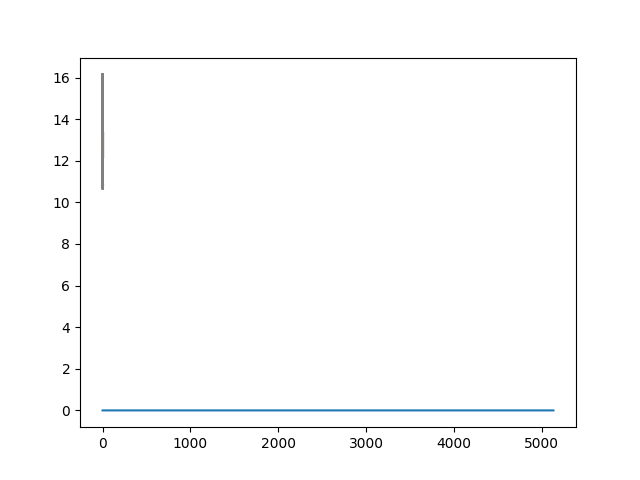

In [45]:
%matplotlib notebook
plt.plot(deviation_list)
#plt.twinx()
#plt.plot([len(t) for t in triangle_list], c='r')
#plt.plot([len(p) for p in polygons], c='g')

In [46]:
def plotMesh(triangles, polygon): 
    xs = polygon[::2]
    ys = polygon[1::2]
    plt.plot(xs, ys)
    for i in range(int(len(triangles)/3)):
        xt = [xs[triangles[3*i]], xs[triangles[3*i+1]], xs[triangles[3*i+2]], xs[triangles[3*i]]]
        yt = [ys[triangles[3*i]], ys[triangles[3*i+1]], ys[triangles[3*i+2]], ys[triangles[3*i]]]
        plt.plot(xt,yt,c='gray')

In [47]:
#plotMesh(triangle_list[2831], polygons[2831])
plotMesh(triangle_list[2681], polygons[2681])

<IPython.core.display.Javascript object>


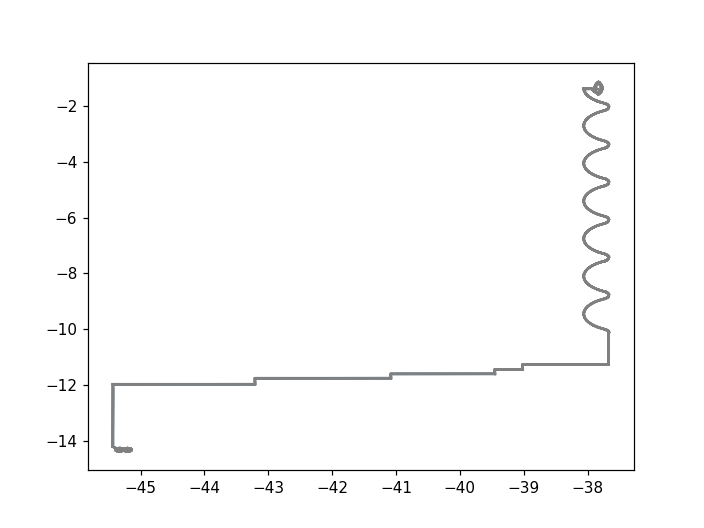

In [189]:
#triags = earcut.earcut(polygons[2706])
#plotMesh(triags, polygons[2706])


for i in range(31,32):
    triags = earcut.earcut(polygons[i])
    plotMesh(triags, polygons[i])

In [65]:
print(len(polygons[2]))

620


In [70]:
print(len(triangle_list))

5286


In [71]:
print(len(polygons))

5135


In [180]:
print(triangle_list[0])
print(len(triangle_list[1337]))

[305, 304, 303, 303, 302, 301, 301, 300, 299, 299, 298, 297, 297, 296, 295, 295, 294, 293, 293, 292, 291, 291, 290, 289, 289, 288, 287, 287, 286, 285, 285, 284, 283, 283, 282, 281, 279, 278, 277, 277, 276, 275, 275, 274, 273, 273, 272, 271, 271, 270, 269, 269, 268, 267, 267, 266, 265, 265, 264, 263, 263, 262, 261, 261, 260, 259, 259, 258, 257, 257, 256, 255, 255, 254, 253, 253, 252, 251, 251, 250, 249, 249, 248, 247, 247, 246, 245, 245, 244, 243, 243, 242, 241, 241, 240, 239, 239, 238, 237, 237, 236, 235, 235, 234, 233, 233, 232, 231, 231, 230, 229, 227, 226, 225, 225, 224, 223, 223, 222, 221, 221, 220, 219, 219, 218, 217, 217, 216, 215, 215, 214, 213, 213, 212, 211, 211, 210, 209, 209, 208, 207, 207, 206, 205, 205, 204, 203, 166, 165, 164, 164, 163, 162, 162, 161, 160, 160, 159, 158, 158, 157, 156, 156, 155, 154, 154, 153, 152, 152, 151, 150, 150, 149, 148, 148, 147, 146, 146, 145, 144, 144, 143, 142, 142, 141, 140, 139, 138, 137, 137, 136, 135, 135, 134, 133, 133, 132, 131, 131, 130,

# Export bottom metal as Wavefront .obj

## Write each track to an individual file

In [183]:
filename_rump = ".\\models\\bottom_metal\\metal_"
filename_ending = ".obj"

In [185]:
for i in range(len(polygons)):
    filename_out = filename_rump + f"{i:04d}" + filename_ending
    outstring = ""
    for k in range(int(len(polygons[i])/2)):
        outstring += f"v {polygons[i][2*k]} {polygons[i][2*k+1]} 0.0\n"
    for k in range(int(len(triangle_list[i])/3)):
        outstring += f"f {triangle_list[i][3*k]} {triangle_list[i][3*k+1]} {triangle_list[i][3*k+2]}"
        if k != int(len(triangle_list[i])/3)-1:
            outstring += "\n"
    with open(filename_out,'w') as outfile:
        outfile.write(outstring)

## Write all tracks to the same file

In [48]:
filename_out = ".\\models\\bottom_metal_single\\bottom_metal.obj"
index_offset = 0
vertex_strings = []
face_strings = []
for i in range(len(polygons)):
    print(i)
    current_polygon = polygons[i]
    current_triangles = triangle_list[i]
    #embed object names into the vertex string, just use the index as name
    vertex_string = f"o {i}\n"
    for k in range(int(len(current_polygon)/2)):
        vertex_string += f"v {current_polygon[2*k]} {current_polygon[2*k+1]} 0.0\n"
    face_string = ""
    for k in range(int(len(current_triangles)/3)):
        face_string += f"f {current_triangles[3*k]+index_offset} {current_triangles[3*k+1]+index_offset} {current_triangles[3*k+2]+index_offset}\n"
    vertex_strings.append(vertex_string)
    face_strings.append(face_string)
    #shift indices
    index_offset += int(len(current_polygon)/2)

with open(filename_out, 'w') as outfile:
    for v in vertex_strings:
        outfile.write(v)
    for f in face_strings:
        outfile.write(f)
        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065


3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
